# Diabetes Prediction

## Problem Statement

**Diabetes is a chronic disease that affects millions worldwide, and early detection is crucial for effective management and prevention. Traditional diagnostic methods often rely on costly and time-consuming medical tests, leading to delays in intervention. The Diabetes Prediction Dataset provides a comprehensive set of health-related attributes that can be leveraged to develop machine learning models for predicting diabetes risk based on physiological and genetic factors.**

***The challenge is to utilize this dataset to:  
            + Identify key health indicators that contribute most significantly to diabetes risk.  
            + Develop an accurate predictive model using machine learning techniques to classify individuals as diabetic or non-diabetic.  
            + Optimize feature selection and model performance to enhance the reliability of predictions.  
            + Visualize and interpret insights from the dataset to support clinical decision-making and early diagnosis.  
            + This study aims to bridge the gap between data science and healthcare by providing an efficient, non-invasive, and cost-effective approach to diabetes risk assessment.***  
            
**The findings could lead to improved early diagnosis, preventive strategies, and personalized treatment plans, ultimately contributing to the fight against diabetes.**

# Objective

Diabetes is a chronic disease affecting millions globally, requiring early detection for effective management. Traditional diagnostic methods are costly and time-consuming, leading to delays in intervention. The Diabetes Prediction Dataset provides health-related attributes that can be used to develop machine learning models for predicting diabetes risk.

This study aims to:

Identify key health indicators contributing to diabetes risk.
Develop an accurate predictive model using machine learning techniques.
Optimize feature selection and model performance for reliability.
Visualize and interpret insights to aid clinical decision-making.
Provide a non-invasive, cost-effective solution for diabetes risk assessment.
By leveraging data science, this approach enhances early diagnosis, supports preventive strategies, and bridges the gap between AI and healthcare, contributing to improved patient outcomes.

# Defining Evaluation Metrics for Classification

## **Evaluation Metrics for Diabetes Prediction Model**

To ensure that our machine learning model is both accurate and reliable, we use several evaluation metrics. In healthcare, the goal is not just to build a model that makes predictions but to ensure that critical decisions—like identifying high-risk diabetic patients—are based on trustworthy insights.

The following metrics help assess the model’s performance:

---

## **1. Accuracy**  

### **Formula:**  
$$
\text{Accuracy} = \frac{TP + TN}{TP + FP + TN + FN}
$$

### **What it means:**  
Accuracy measures how many predictions were correct out of all cases.

### **Why it matters in healthcare:**  
- Provides a general idea of how well the model performs.  
- If the dataset is imbalanced (e.g., if 90% of cases are non-diabetic), accuracy can be misleading.

### **Example:**  
If 95 out of 100 patients are classified correctly, accuracy = 95%.

---

## **2. Precision (Positive Predictive Value)**  

### **Formula:**  
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

### **What it means:**  
Precision tells us how many of the patients predicted as diabetic are actually diabetic.

### **Why it matters in healthcare:**  
- Helps reduce false alarms (false positives).  
- Important if unnecessary stress, costly tests, or incorrect treatments need to be avoided.

### **Example:**  
If the model predicts 100 people as diabetic, but only 80 actually have diabetes, precision = 80%.

---

## **3. Recall (Sensitivity / True Positive Rate)**  

### **Formula:**  
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

### **What it means:**  
Recall tells us how many actual diabetic cases were correctly identified.

### **Why it matters in healthcare:**  
- More important than precision when missing a diagnosis is dangerous.  
- A low recall means many actual diabetics go undiagnosed, leading to severe complications.

### **Example:**  
If 100 patients truly have diabetes but the model only catches 70, recall = 70%.

---

## **4. F1-Score (Balancing Precision & Recall)**  

### **Formula:**  
$$
F1\text{-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

### **What it means:**  
The F1-score is a balance between precision and recall, ensuring that the model is neither too cautious nor too aggressive.

### **Why it matters in healthcare:**  
- Useful when both false positives and false negatives have consequences.  
- Helps in imbalanced datasets where diabetic cases are fewer than non-diabetic cases.

### **Example:**  
A model with high recall but low precision (catching most diabetics but also mislabeling healthy people) will have a low F1-score.

---

## **5. ROC-AUC Score (How Well the Model Separates Cases)**  

### **Formula:**  
$$
AUC = \int_0^1 TPR(x) dx
$$

### **What it means:**  
The ROC-AUC score tells us how well the model differentiates between diabetic and non-diabetic cases.

### **Why it matters in healthcare:**  
- Higher AUC (closer to 1.0) means better performance in distinguishing between high-risk and low-risk patients.  
- Helps clinicians prioritize patients based on risk levels.

### **Example:**  
- **AUC = 0.9:** The model is very good at separating diabetic and non-diabetic patients.  
- **AUC = 0.5:** The model is no better than random guessing.

---

## **Why These Metrics Matter in Healthcare**  

- **False Positives (FP):** Misdiagnosing a healthy patient as diabetic → Unnecessary anxiety & expensive tests.  
- **False Negatives (FN):** Missing a real diabetic case → Severe health risks & late treatment.  

# **Chosen Metrics for Diabetes Prediction**

## **Balancing Precision & Recall is crucial:**  
- **Precision** is important when we want to avoid unnecessary treatments.  
- **Recall** is crucial when missing a diabetic case is dangerous.  
- **AUC-ROC** helps compare models and select the best one for real-world deployment in hospitals or clinics.  

This ensures that our model is not only accurate but also **clinically reliable and useful** for making critical healthcare decisions.


## Importing required Libraries

In [288]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4


In [1]:
import numpy as np
import pandas as pd

import itertools

import matplotlib.pyplot as plt
import missingno as msno 
import seaborn as sns
sns.set_style("whitegrid")

from scipy.stats import normaltest, boxcox

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

## Loading the dataset using Pandas

In [2]:
df = pd.read_csv("data/Healthcare-Diabetes.csv")
df.head()

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [4]:
df.dtypes

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

* We have 2 Float data type in the columns.
* Also we have 8 Integer type column in the dataset.
* Also we could interpret that there are no null values in the dataset.
* Outcome is a binary column but is in int type

## Understanding the dataset

In [5]:
df.loc[:5]

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   
5   6            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0

### Column Definition
* There are 10 columns in the dataset.
* The dataset is about patient's health vitals, age, pregnancies, Outcome.
* **ID** - Unique identifier of each data in the dataset.
* **Pregnancies** - The no. of pregnancies each patient has had.
* **Glucose** - Plasma glucose level measured 2 hours after an oral glucose tolerance test (OGTT) to assess glucose metabolism.
* **Blood Pressure** - Diastolic blood pressure (mm Hg) of the patient.
* **Skin Thickness** - Triceps skinfold thickness (mm) of the patient.
* **Insulin** - The level of insulin of the patient
* **BMI** - The Body Mass Index of the patient measured in weight in kg / height in m^2
* **Diabetes Pedigree Function** - Diabetes pedigree function, a genetic score of diabetes.
* **Age** - Age of the patient.
* **Outcome** - Binary classification indicating the presence (1) or absence (0) of diabetes **Target Variable**

**Since we have the column Pregnancies, It is understood that this whole dataset is about the female patients**

### **About the Tests for Diabetes**

***Oral Glucose Tolerance Test***
* Glucose and Insulin levels are calculated using the **Oral Glucose Tolerance Test** which basically helps in diagnosing diabetes and pre-diabetes.

***Glucose Insights***
* **Average Healthy Persons Glucose Level** after OGTT test is **less than 140mg/dL**.
* For **Pre-Diabetes Patients Glucose Level** is between **140-199mg/dL** after OGTT
* For **Diabetes Patient Glucose Level** is greater than **200mg/dL** after OGTT.

***Insulin Insights***
* Average **Healthy persons Insulin Level** after OGTT test is between **15-30µU/mL**
* Higher than normal indicates the patient might have **risk of Diabetes 2** indicating **insulin resistance**.
* Lower than normal indicates the patient might have **risk of Type 1 or Advanced type 2** indicating **insulin deficiency**.

### Dataset Shape

In [6]:
print("The shape of the dataset is", df.shape)
print("The number of rows in the dataset is", df.shape[0])
print("The number of columns in the dataset is", df.shape[1])

The shape of the dataset is (2768, 10)
The number of rows in the dataset is 2768
The number of columns in the dataset is 10


### Null Value Analysis

In [7]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

print(null_summary)

                          Null Count  Null Percentage
Id                                 0              0.0
Pregnancies                        0              0.0
Glucose                            0              0.0
BloodPressure                      0              0.0
SkinThickness                      0              0.0
Insulin                            0              0.0
BMI                                0              0.0
DiabetesPedigreeFunction           0              0.0
Age                                0              0.0
Outcome                            0              0.0


* There is no null values in the dataset.

### Five Point Summary - Descriptive Statistics

In [9]:
# since we are having datatypes  
# including all despite of only continuous variable
df.describe(include='all')

Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.325669    11.777230   
min       0.000000     0.000000                  0.078000    21.000000   
25%       0.000000    27.300000                  0.244000    24.000000   
50%      37.000000    32.200000                  0.375000    29.000000   
75%     130.000000    36.625000                  0.624000    40.000000   
max     846.000000    80.600000                  2.420000    81.000000   

           Outcome  
count  2768.000000  
mean      0.343931  
std       0.475104  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [10]:
#Since we are getting 0's in few health vital columns, we are splitting into percentile wise to understand at which percent the data is converting from 0
df.describe(include='all', percentiles=[0.005, 0.006, 0.007, 0.01, 0.03, 0.05, 0.1, 0.5, 0.8, 0.9, 1])

Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
0.5%     14.835000     0.000000     0.000000       0.000000       0.000000   
0.6%     17.602000     0.000000     0.000000       0.000000       0.000000   
0.7%     20.369000     0.000000    44.000000       0.000000       0.000000   
1%       28.670000     0.000000    57.000000       0.000000       0.000000   
3%       84.010000     0.000000    74.000000       0.000000       0.000000   
5%      139.350000     0.000000    79.350000      40.000000       0.000000   
10%     277.700000     0.000000    85.000000      54.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
80%    2214.600000     7.000000   147.000000      82.000000      35.000000   
90%    2491.300000     9.000000   168.000000      88.000000      40.000000   
100%   2768.000000    17.000000   199.000000     122.000000     110.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.325669    11.777230   
min       0.000000     0.000000                  0.078000    21.000000   
0.5%      0.000000     0.000000                  0.088000    21.000000   
0.6%      0.000000     0.000000                  0.088000    21.000000   
0.7%      0.000000     0.000000                  0.088000    21.000000   
1%        0.000000     0.000000                  0.096000    21.000000   
3%        0.000000    20.000000                  0.127000    21.000000   
5%        0.000000    21.800000                  0.141000    21.000000   
10%       0.000000    23.670000                  0.164000    22.000000   
50%      37.000000    32.200000                  0.375000    29.000000   
80%     155.000000    38.000000                  0.687000    42.000000   
90%     210.000000    42.030000                  0.878600    50.000000   
100%    846.000000    80.600000                  2.420000    81.000000   
max     846.000000    80.600000                  2.420000    81.000000   

           Outcome  
count  2768.000000  
mean      0.343931  
std       0.475104  
min       0.000000  
0.5%      0.000000  
0.6%      0.000000  
0.7%      0.000000  
1%        0.000000  
3%        0.000000  
5%        0.000000  
10%       0.000000  
50%       0.000000  
80%       1.000000  
90%       1.000000  
100%      1.000000  
max       1.000000

**Minimum Maximum Values of the Variables**
* There are around 2768 data points in the dataset.
* Since Id is a unique column we have 1 as min and 2768 max.
* **Pregnancies** column has the least of 0 pregnancy and with the highest of 17.
* **Glucose** column has the least of 0 and the highest is 199.
* **Blood Pressure** column has the minimum of 0 and the maximum of 122.
* **SkinThickness** column has least of 0 and max of 110.
* **Insulin** column has least of 0 and max with 846.
* **BMI** column has minimum of 0 and maximum of 80.
* **Diabetes Pedigree Function** column has minimum of 0.078 and maximum of 2.42.
* **Age** column has minimum of 21 and with maximum age 81.
* **Outcome** column has 0 and 1's

**Mean values of the Variables**
* Average pregnancy of the patients in the dataset is approx 4
* Average Glucose level of the dataset is 121.102
* Average Blood Pressure level of the dataset is 69.134393
* Average Skin Thickness level of the dataset is 16.05
* Average Insulin level of the dataset is 80.128
* Average BMI level of the dataset is 32.137
* Average Diabetes Pedigree function level of the dataset is 0.471
* Average Age of the dataset is 33

**Standard Deviation of the Variables**
* Standard Deviation of the pregnancy is 3.323
* Standard Deviation of the glucose is 32.03
* Standard Deviation of the blood pressure is 19.231
* Standard Deviation of the skin thickness is 16.059
* Standard Deviation of the insulin is 112.30
* Standard Deviation of the BMI is 8.076
* Standard Deviation of the Diabetes Pedigree Function is 3.323
* Standard Deviation of the Age is 3.323

## Target Variable Analysis

In [11]:
df['Outcome'].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

In [12]:
(df['Outcome'].value_counts(normalize=True))*100

Outcome
0    65.606936
1    34.393064
Name: proportion, dtype: float64

* As we could see that 65% of People has no diabetes
* 34% of people have diabetes
* Data is imbalanced.
* SMOTE is a technique that synthesis data and do oversampling for lower no. 

## Data Abnormalitites

* As we could derive from the insights above, there is a minimum value of 0 in Glucose Column which is medically impossible.
* Checking for the columns that contains 0 which cannot be possible

### Glucose Variable Check.

In [13]:
df[df['Glucose'] == 0]

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75      76            1        0             48             20        0  24.7   
182    183            1        0             74             20       23  27.7   
342    343            1        0             68             35        0  32.0   
349    350            5        0             80             32        0  41.0   
502    503            6        0             68             41        0  39.0   
788    789            6        0             68             41        0  39.0   
843    844            1        0             48             20        0  24.7   
950    951            1        0             74             20       23  27.7   
1110  1111            1        0             68             35        0  32.0   
1117  1118            5        0             80             32        0  41.0   
1270  1271            6        0             68             41        0  39.0   
1580  1581            1        0             68             35        0  32.0   
1587  1588            5        0             80             32        0  41.0   
1740  1741            6        0             68             41        0  39.0   
2108  2109            1        0             74             20       23  27.7   
2363  2364            1        0             68             35        0  32.0   
2370  2371            5        0             80             32        0  41.0   
2664  2665            1        0             48             20        0  24.7   

      DiabetesPedigreeFunction  Age  Outcome  
75                       0.140   22        0  
182                      0.299   21        0  
342                      0.389   22        0  
349                      0.346   37        1  
502                      0.727   41        1  
788                      0.727   41        1  
843                      0.140   22        0  
950                      0.299   21        0  
1110                     0.389   22        0  
1117                     0.346   37        1  
1270                     0.727   41        1  
1580                     0.389   22        0  
1587                     0.346   37        1  
1740                     0.727   41        1  
2108                     0.299   21        0  
2363                     0.389   22        0  
2370                     0.346   37        1  
2664                     0.140   22        0

In [14]:
df[df['Glucose'] == 0].shape[0]

18

In [15]:
(df[df['Glucose'] == 0].shape[0]/len(df['Glucose']))*100

0.6502890173410405

* There are 18 rows that contains 0 in the Glucose column and 0.65% of null values are 0's

In [16]:
#keeping the threshold as 20 since 0.7% of the data has a whole number instead of zero.
df_glucose_0 = df[df['Glucose'] < 40]
df_glucose_0

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75      76            1        0             48             20        0  24.7   
182    183            1        0             74             20       23  27.7   
342    343            1        0             68             35        0  32.0   
349    350            5        0             80             32        0  41.0   
502    503            6        0             68             41        0  39.0   
788    789            6        0             68             41        0  39.0   
843    844            1        0             48             20        0  24.7   
950    951            1        0             74             20       23  27.7   
1110  1111            1        0             68             35        0  32.0   
1117  1118            5        0             80             32        0  41.0   
1270  1271            6        0             68             41        0  39.0   
1580  1581            1        0             68             35        0  32.0   
1587  1588            5        0             80             32        0  41.0   
1740  1741            6        0             68             41        0  39.0   
2108  2109            1        0             74             20       23  27.7   
2363  2364            1        0             68             35        0  32.0   
2370  2371            5        0             80             32        0  41.0   
2664  2665            1        0             48             20        0  24.7   

      DiabetesPedigreeFunction  Age  Outcome  
75                       0.140   22        0  
182                      0.299   21        0  
342                      0.389   22        0  
349                      0.346   37        1  
502                      0.727   41        1  
788                      0.727   41        1  
843                      0.140   22        0  
950                      0.299   21        0  
1110                     0.389   22        0  
1117                     0.346   37        1  
1270                     0.727   41        1  
1580                     0.389   22        0  
1587                     0.346   37        1  
1740                     0.727   41        1  
2108                     0.299   21        0  
2363                     0.389   22        0  
2370                     0.346   37        1  
2664                     0.140   22        0

In [17]:
print("The no. of rows that contains zero as glucose level are", df[df['Glucose'] < 40].shape[0])

The no. of rows that contains zero as glucose level are 18


### Blood Pressure Variable Check.

In [18]:
df[df['BloodPressure'] == 0]

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7        8           10      115              0              0        0  35.3   
15      16            7      100              0              0        0  30.0   
49      50            7      105              0              0        0   0.0   
60      61            2       84              0              0        0   0.0   
78      79            0      131              0              0        0  43.2   
...    ...          ...      ...            ...            ...      ...   ...   
2638  2639            7      105              0              0        0   0.0   
2649  2650            2       84              0              0        0   0.0   
2667  2668            0      131              0              0        0  43.2   
2670  2671            2       74              0              0        0   0.0   
2761  2762            2       87              0             23        0  28.9   

      DiabetesPedigreeFunction  Age  Outcome  
7                        0.134   29        0  
15                       0.484   32        1  
49                       0.305   24        0  
60                       0.304   21        0  
78                       0.270   26        1  
...                        ...  ...      ...  
2638                     0.305   24        0  
2649                     0.304   21        0  
2667                     0.270   26        1  
2670                     0.102   22        0  
2761                     0.773   25        0  

[125 rows x 10 columns]

In [19]:
df[df['BloodPressure'] == 0].shape[0]

125

In [20]:
(df[df['BloodPressure'] == 0].shape[0]/len(df))*100

4.515895953757226

* Around 4.5% of Blood Pressure Values are 0's and total number of data points are 125

### Insulin Variable Check

In [21]:
df[df['Insulin'] == 0]

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35        0  33.6   
1        2            1       85             66             29        0  26.6   
2        3            8      183             64              0        0  23.3   
5        6            5      116             74              0        0  25.6   
7        8           10      115              0              0        0  35.3   
...    ...          ...      ...            ...            ...      ...   ...   
2756  2757            4      120             68              0        0  29.6   
2757  2758            4      110             66              0        0  31.9   
2759  2760            6      102             82              0        0  30.8   
2761  2762            2       87              0             23        0  28.9   
2765  2766            6       85             78              0        0  31.2   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.627   50        1  
1                        0.351   31        0  
2                        0.672   32        1  
5                        0.201   30        0  
7                        0.134   29        0  
...                        ...  ...      ...  
2756                     0.709   34        0  
2757                     0.471   29        0  
2759                     0.180   36        1  
2761                     0.773   25        0  
2765                     0.382   42        0  

[1330 rows x 10 columns]

In [22]:
df[df['Insulin'] == 0].shape[0]

1330

In [23]:
(df[df['Insulin'] == 0].shape[0]/len(df))*100

48.04913294797688

* Around 48% of insulin data are null and around 1330 insulin datapoints are 0's


### BMI Variable Check

In [24]:
df[df['BMI'] == 0]

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
9       10            8      125             96              0        0  0.0   
49      50            7      105              0              0        0  0.0   
60      61            2       84              0              0        0  0.0   
81      82            2       74              0              0        0  0.0   
145    146            0      102             75             23        0  0.0   
371    372            0      118             64             23       89  0.0   
426    427            0       94              0              0        0  0.0   
494    495            3       80              0              0        0  0.0   
522    523            6      114              0              0        0  0.0   
684    685            5      136             82              0        0  0.0   
706    707           10      115              0              0        0  0.0   
780    781            3       80              0              0        0  0.0   
817    818            7      105              0              0        0  0.0   
828    829            2       84              0              0        0  0.0   
849    850            2       74              0              0        0  0.0   
913    914            0      102             75             23        0  0.0   
1139  1140            0      118             64             23       89  0.0   
1194  1195            0       94              0              0        0  0.0   
1262  1263            3       80              0              0        0  0.0   
1290  1291            6      114              0              0        0  0.0   
1452  1453            5      136             82              0        0  0.0   
1474  1475           10      115              0              0        0  0.0   
1609  1610            0      118             64             23       89  0.0   
1664  1665            0       94              0              0        0  0.0   
1732  1733            3       80              0              0        0  0.0   
1909  1910            5      136             82              0        0  0.0   
1931  1932           10      115              0              0        0  0.0   
2071  2072            0      102             75             23        0  0.0   
2253  2254            0       94              0              0        0  0.0   
2321  2322            3       80              0              0        0  0.0   
2344  2345            3       80              0              0        0  0.0   
2392  2393            0      118             64             23       89  0.0   
2447  2448            0       94              0              0        0  0.0   
2540  2541            5      136             82              0        0  0.0   
2562  2563           10      115              0              0        0  0.0   
2638  2639            7      105              0              0        0  0.0   
2649  2650            2       84              0              0        0  0.0   
2670  2671            2       74              0              0        0  0.0   
2734  2735            0      102             75             23        0  0.0   

      DiabetesPedigreeFunction  Age  Outcome  
9                        0.232   54        1  
49                       0.305   24        0  
60                       0.304   21        0  
81                       0.102   22        0  
145                      0.572   21        0  
371                      1.731   21        0  
426                      0.256   25        0  
494                      0.174   22        0  
522                      0.189   26        0  
684                      0.640   69        0  
706                      0.261   30        1  
780                      0.174   22        0  
817                      0.305   24        0  
828                      0.304   21        0  
849                      0.102   22        0  
913                      0.572   21        0  
1139    

In [25]:
df[df['BMI'] == 0].shape[0]

39

In [33]:
(df[df['BMI'] == 0].shape[0]/len(df))*100

1.4089595375722543

* 1.4% of BMI data and 39 rows has 0's in BMI column

Correllation between the variables

In [26]:
df.corr()

Id  Pregnancies   Glucose  BloodPressure  \
Id                        1.000000    -0.024222  0.015010       0.009717   
Pregnancies              -0.024222     1.000000  0.122839       0.147253   
Glucose                   0.015010     0.122839  1.000000       0.142095   
BloodPressure             0.009717     0.147253  0.142095       1.000000   
SkinThickness             0.017702    -0.068673  0.061023       0.201167   
Insulin                   0.007359    -0.075734  0.323445       0.087823   
BMI                       0.024007     0.018761  0.225308       0.281560   
DiabetesPedigreeFunction -0.009695    -0.027731  0.127195       0.048471   
Age                      -0.007404     0.540805  0.256958       0.238684   
Outcome                  -0.006298     0.223796  0.460644       0.072900   

                          SkinThickness   Insulin       BMI  \
Id                             0.017702  0.007359  0.024007   
Pregnancies                   -0.068673 -0.075734  0.018761   
Glucose                        0.061023  0.323445  0.225308   
BloodPressure                  0.201167  0.087823  0.281560   
SkinThickness                  1.000000  0.445345  0.393494   
Insulin                        0.445345  1.000000  0.215926   
BMI                            0.393494  0.215926  1.000000   
DiabetesPedigreeFunction       0.179830  0.190500  0.129766   
Age                           -0.111895 -0.073458  0.038175   
Outcome                        0.075603  0.123646  0.280928   

                          DiabetesPedigreeFunction       Age   Outcome  
Id                                       -0.009695 -0.007404 -0.006298  
Pregnancies                              -0.027731  0.540805  0.223796  
Glucose                                   0.127195  0.256958  0.460644  
BloodPressure                             0.048471  0.238684  0.072900  
SkinThickness                             0.179830 -0.111895  0.075603  
Insulin                                   0.190500 -0.073458  0.123646  
BMI                                       0.129766  0.038175  0.280928  
DiabetesPedigreeFunction                  1.000000  0.028544  0.160664  
Age                                       0.028544  1.000000  0.237050  
Outcome                                   0.160664  0.237050  1.000000

### Skin Thickness check

In [27]:
df[df['SkinThickness'] == 0]

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2        3            8      183             64              0        0  23.3   
5        6            5      116             74              0        0  25.6   
7        8           10      115              0              0        0  35.3   
9       10            8      125             96              0        0   0.0   
10      11            4      110             92              0        0  37.6   
...    ...          ...      ...            ...            ...      ...   ...   
2753  2754            0      131             88              0        0  31.6   
2756  2757            4      120             68              0        0  29.6   
2757  2758            4      110             66              0        0  31.9   
2759  2760            6      102             82              0        0  30.8   
2765  2766            6       85             78              0        0  31.2   

      DiabetesPedigreeFunction  Age  Outcome  
2                        0.672   32        1  
5                        0.201   30        0  
7                        0.134   29        0  
9                        0.232   54        1  
10                       0.191   30        0  
...                        ...  ...      ...  
2753                     0.743   32        1  
2756                     0.709   34        0  
2757                     0.471   29        0  
2759                     0.180   36        1  
2765                     0.382   42        0  

[800 rows x 10 columns]

In [28]:
df[df['SkinThickness'] == 0].shape[0]

800

In [29]:
(df[df['SkinThickness'] == 0].shape[0]/len(df))*100

28.901734104046245

* 29% of Skin Thickness column has 0's in em with 800 data points

In [30]:
df[df['DiabetesPedigreeFunction'] == 0]

Empty DataFrame
Columns: [Id, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

### **The columns Glucose, Blood Pressure, Skin Thickness, Insulin, BMI has 0's in it.**
### **Assuming they have misinterpreted as 0's or pregnancy women must have not took the test.**
### **Hence we can try to understand the patterns in 0's.**
### **First convert 0's with Null and then visualizing the Missing data**

### Checking the Distribution of Glucose Value.

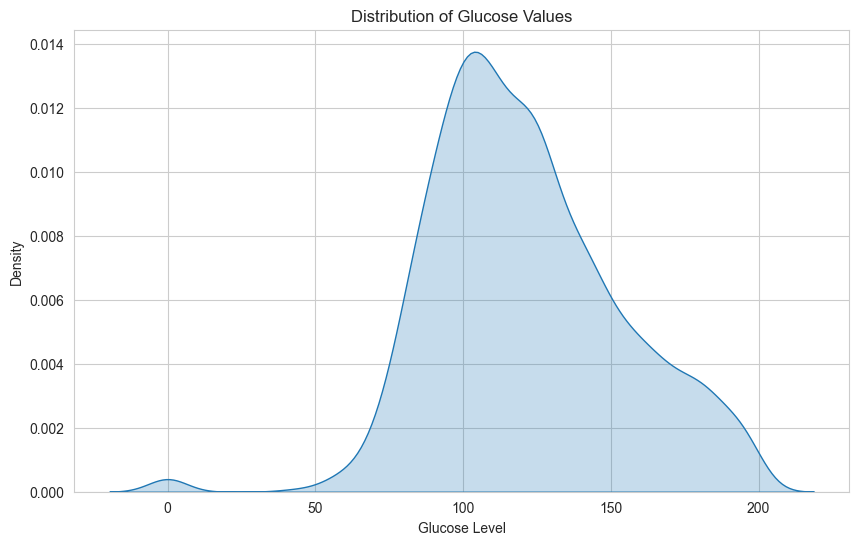

In [31]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Glucose'], shade=True)
plt.title('Distribution of Glucose Values')
plt.xlabel('Glucose Level')
plt.ylabel('Density')
plt.show()

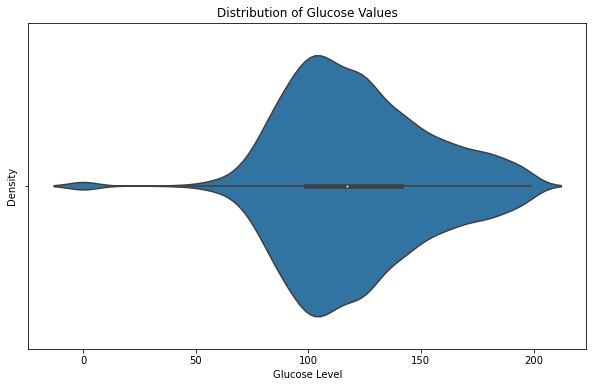

In [47]:
plt.figure(figsize=(10, 6))
sns.violinplot(df['Glucose'], shade=True)
plt.title('Distribution of Glucose Values')
plt.xlabel('Glucose Level')
plt.ylabel('Density')
plt.show()

In [32]:
df['Glucose'].skew()

0.16286438598202155

* As we could see that there is nearly normally distributed. Hence we can consider that the data is normally distributed.
* 0.5 to 1 is considered as slightly. 
* Hence we are seperating the non-zero value's standard deviation and mean value to impute the values.

### Seperating Non Zero and Checking Distribution - Glucose

In [33]:
df_glucose_non_zero = df[df['Glucose'] != 0]
df_glucose_non_zero.shape

(2750, 10)

In [34]:
stat, p = normaltest(df_glucose_non_zero['Glucose'])
print(f'Normality test p-value: {p}')

if p > 0.05:
    print('The distribution is normal.')
else:
    print('The distribution is not normal.')

Normality test p-value: 1.3816973637703716e-28
The distribution is not normal.


## Replacing 0's with Nan and visualizing using MSNO Plot

In [35]:
# Seperating columns containing 0's
zero_columns = ["BMI", "Insulin", "BloodPressure", "Glucose", "SkinThickness"]

# Replacing 0's with Nan
df[zero_columns] = df[zero_columns].replace(0, np.nan)

## Null Value Check after Imputing Null

In [36]:
df.shape

(2768, 10)

In [37]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### **Null value Row Wise**

In [38]:
df.isnull().sum()

Id                             0
Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

### **Null value row-wise percentage**

In [39]:
(df.isnull().sum()/len(df))*100

Id                           0.000000
Pregnancies                  0.000000
Glucose                      0.650289
BloodPressure                4.515896
SkinThickness               28.901734
Insulin                     48.049133
BMI                          1.408960
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

* Skin thickness and Insulin has a significant amount of null values in it.
* Around 50% of insulin data is not available which is a major concern
* hence we need to find a proper way to impute it since insulin plays a crutial role in Diabetes prediction

## Analyze Missing Data using Heatmap of missing values

<Figure size 1200x600 with 0 Axes>

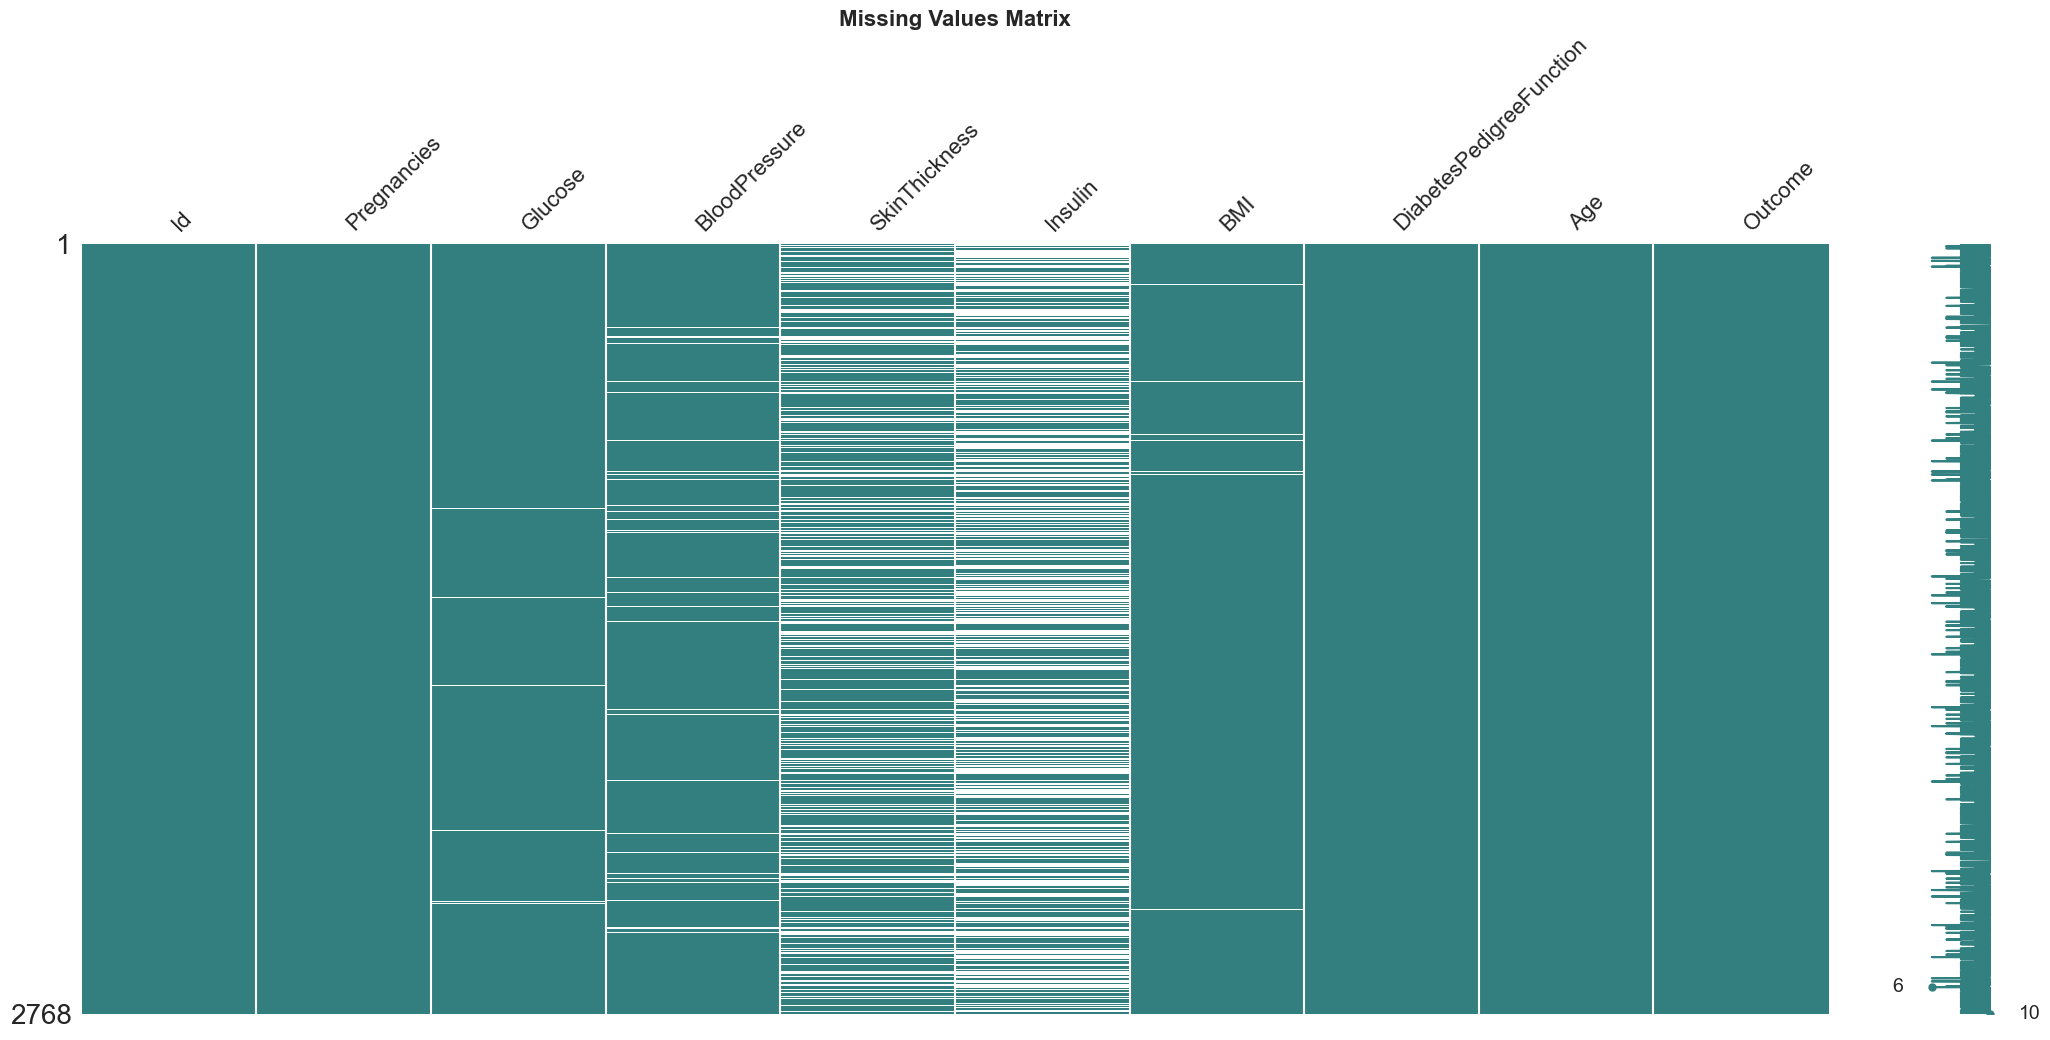

In [46]:
# msno.matrix(df)
# plt.show()

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

msno.matrix(df, 
            sparkline=True,  
            color=(0.2, 0.5, 0.5))      # Purple-Pink gradient
plt.title("Missing Values Matrix", fontsize=16, fontweight='bold') 
plt.show()

In [51]:
df.head()

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6    148.0           72.0           35.0      NaN  33.6   
1   2            1     85.0           66.0           29.0      NaN  26.6   
2   3            8    183.0           64.0            NaN      NaN  23.3   
3   4            1     89.0           66.0           23.0     94.0  28.1   
4   5            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

<Figure size 1200x600 with 0 Axes>

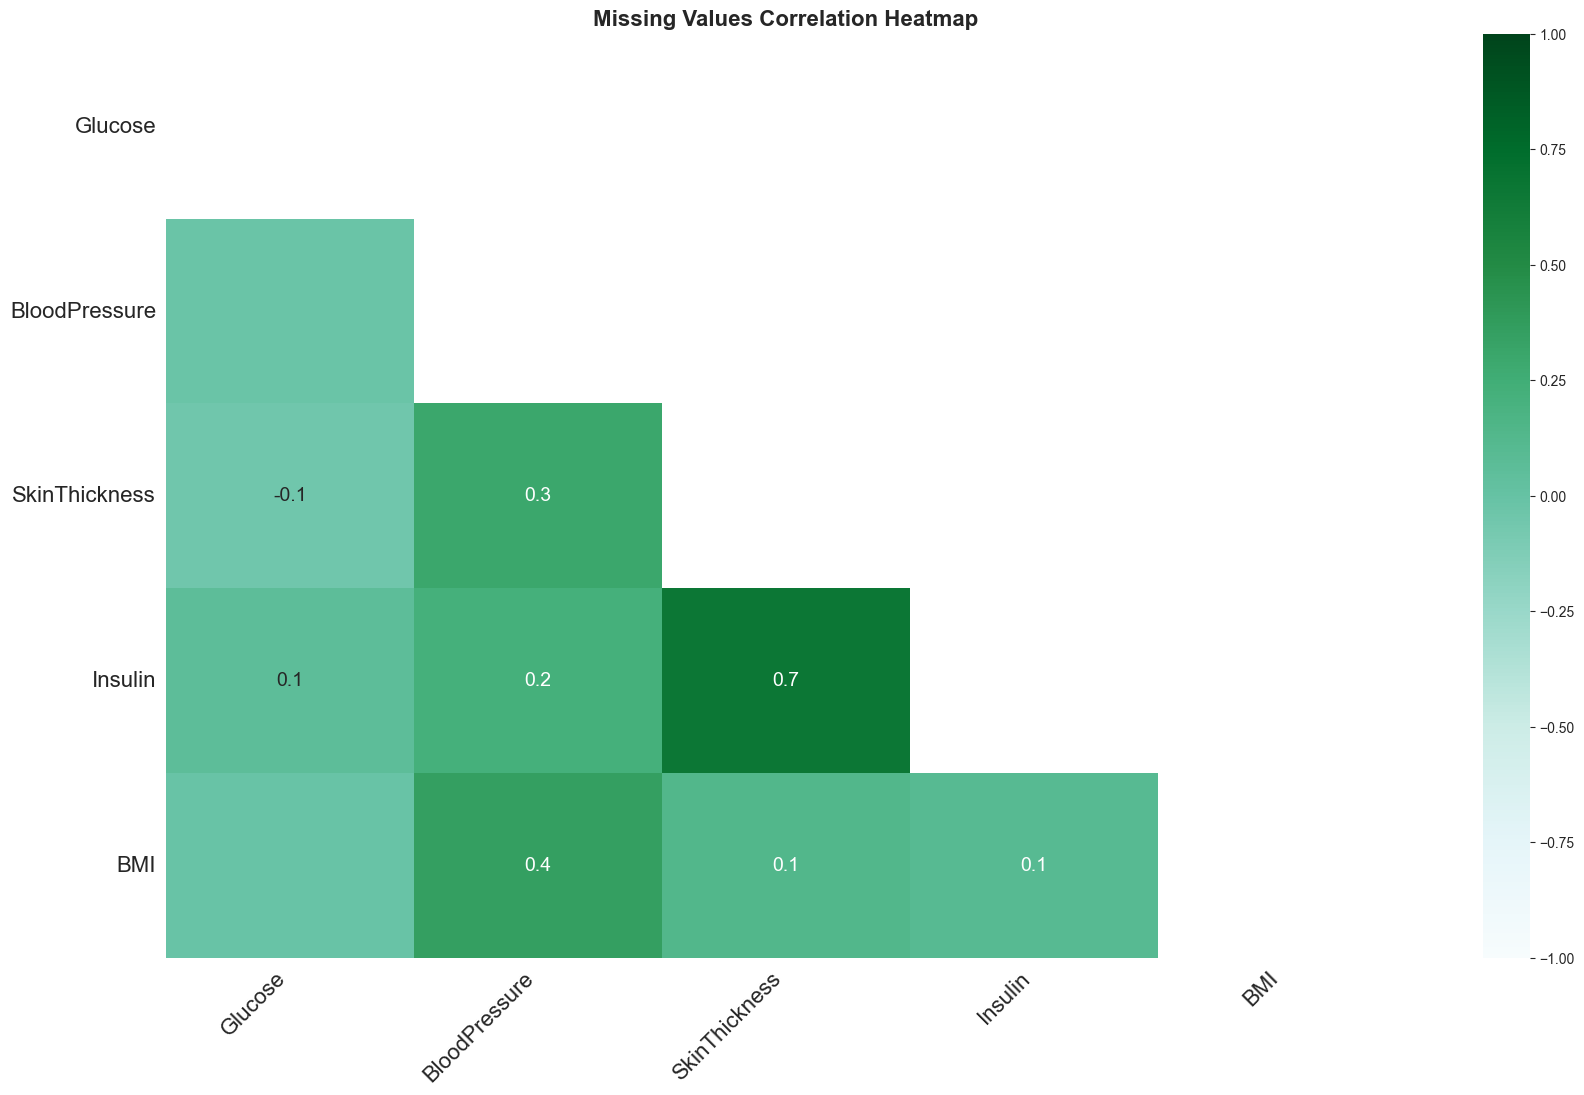

In [52]:
# msno.heatmap(df, cmap='mako')
plt.figure(figsize=(12, 6))
msno.heatmap(df, cmap="BuGn")
plt.title("Missing Values Correlation Heatmap", fontsize=16, fontweight='bold')

plt.show()

* As we could see that Insulin and Skin thickness has the highest significant amount of corelation with each other meaning the missing values are highly correlated with each other.
* Secondly BMI and Blood pressure which is moderately correlated with each other
* Skin thickness and BP has 0.4 which is very low co-relation, meaning they are not dependent with each other in missing values.

## **Imputing Zero's**

* **As we could see that less than 5% of missing values are there in BMI, Blood Pressure and Glucose we are considering to impute them with median imputation**
* **Median imputation is selected since they do not influence the outliers, whereas mean does**
* **Also since Insulin and Skin Thickness has a significant amount of Null values in it, we can use MICE and KNN imputers since they use Iteratively predicts missing values using regression models on other features.**
* **Also there are few regression type of imputers which predicts the values and gives a linear data distribution without affecting it.**

## **Concept of MICE:**
MICE (Multiple Imputation by Chained Equations) is a robust method for handling missing data. It iteratively imputes missing values by modeling each feature as a function of other features, using regression. Unlike single imputation, MICE preserves statistical uncertainty by generating multiple imputed datasets, improving accuracy in medical/biological datasets where missingness is non-random. Key advantages:

Handles complex data relationships.

Reduces bias compared to mean/median imputation.

Compatible with scikit-learn’s IterativeImputer.

### Why is KNN Imputer?

* Since the distributions is not normal and we cannot impute it with mean.
* Hence we are going with KNN imputer.

* KNN Imputer works by finding the K-Nearest Neighbors based on distance metric such as Euclidean distance to the observation with missing values. 
* It then imputes the missing values based on the weighted average of the nearest neighbors values for that feature.
* KNN imputer considers the relationships when imputing missing values. 
* For example if glucose level are correlated with age, BMI, or pregnancy, KNN can leverage those concepts to make better imputations.

In [54]:
# Less than 5%
# Copying the data into another dataframe so that the original dataset can be used further.
df_mice_imputed = df.copy()
df_mice_imputed['Glucose'].fillna(df['Glucose'].median(), inplace=True)
df_mice_imputed['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)
df_mice_imputed['BMI'].fillna(df['BMI'].median(), inplace=True)

In [55]:
# >5% imputation 
imputer = IterativeImputer(max_iter=10, random_state=42)
df_mice_imputed[['SkinThickness', 'Insulin']] = imputer.fit_transform(df_mice_imputed[['SkinThickness', 'Insulin']])

In [56]:
df_mice_imputed.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
df_mice_imputed.describe(include='all', percentiles=[0.005, 0.006, 0.007, 0.01, 0.03, 0.05, 0.1, 0.5, 0.8, 0.9, 1])

Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.863439      72.385838      29.291149   
std     799.197097     3.323801    30.503499      11.988549       9.031354   
min       1.000000     0.000000    44.000000      24.000000       7.000000   
0.5%     14.835000     0.000000    60.340000      40.000000      10.000000   
0.6%     17.602000     0.000000    61.000000      44.000000      10.000000   
0.7%     20.369000     0.000000    62.000000      44.000000      10.000000   
1%       28.670000     0.000000    67.670000      44.000000      10.000000   
3%       84.010000     0.000000    75.000000      50.000000      13.000000   
5%      139.350000     0.000000    80.000000      52.000000      14.000000   
10%     277.700000     0.000000    86.000000      58.000000      18.000000   
50%    1384.500000     3.000000   117.000000      72.000000      29.291149   
80%    2214.600000     7.000000   147.000000      82.000000      35.000000   
90%    2491.300000     9.000000   168.000000      88.000000      40.000000   
100%   2768.000000    17.000000   199.000000     122.000000     110.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean    154.201419    32.593895                  0.471193    33.132225   
std      82.162556     7.103462                  0.325669    11.777230   
min      14.000000    18.200000                  0.078000    21.000000   
0.5%     18.000000    18.984500                  0.088000    21.000000   
0.6%     18.000000    19.220400                  0.088000    21.000000   
0.7%     22.000000    19.300000                  0.088000    21.000000   
1%       23.000000    19.500000                  0.096000    21.000000   
3%       44.000000    21.100000                  0.127000    21.000000   
5%       50.000000    22.200000                  0.141000    21.000000   
10%      67.000000    24.170000                  0.164000    22.000000   
50%     154.201419    32.400000                  0.375000    29.000000   
80%     170.000000    38.000000                  0.687000    42.000000   
90%     210.000000    42.030000                  0.878600    50.000000   
100%    846.000000    80.600000                  2.420000    81.000000   
max     846.000000    80.600000                  2.420000    81.000000   

           Outcome  
count  2768.000000  
mean      0.343931  
std       0.475104  
min       0.000000  
0.5%      0.000000  
0.6%      0.000000  
0.7%      0.000000  
1%        0.000000  
3%        0.000000  
5%        0.000000  
10%       0.000000  
50%       0.000000  
80%       1.000000  
90%       1.000000  
100%      1.000000  
max       1.000000

## Exploratory Data Analysis

In [58]:
df_mice_imputed.head()

Id  Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0   1            6    148.0           72.0      35.000000  165.746407  33.6   
1   2            1     85.0           66.0      29.000000  153.612629  26.6   
2   3            8    183.0           64.0      29.291149  154.201419  23.3   
3   4            1     89.0           66.0      23.000000   94.000000  28.1   
4   5            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [59]:
# dropping id column snce it is not needed.
df_mice_imputed.drop(columns='Id', axis=1)

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0               6    148.0           72.0      35.000000  165.746407  33.6   
1               1     85.0           66.0      29.000000  153.612629  26.6   
2               8    183.0           64.0      29.291149  154.201419  23.3   
3               1     89.0           66.0      23.000000   94.000000  28.1   
4               0    137.0           40.0      35.000000  168.000000  43.1   
...           ...      ...            ...            ...         ...   ...   
2763            2     75.0           64.0      24.000000   55.000000  29.7   
2764            8    179.0           72.0      42.000000  130.000000  32.7   
2765            6     85.0           78.0      29.291149  154.201419  31.2   
2766            0    129.0          110.0      46.000000  130.000000  67.1   
2767            2     81.0           72.0      15.000000   76.000000  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.627   50        1  
1                        0.351   31        0  
2                        0.672   32        1  
3                        0.167   21        0  
4                        2.288   33        1  
...                        ...  ...      ...  
2763                     0.370   33        0  
2764                     0.719   36        1  
2765                     0.382   42        0  
2766                     0.319   26        1  
2767                     0.547   25        0  

[2768 rows x 9 columns]

In [68]:
df_mice_imputed.drop(columns=['Id'], axis=1, inplace=True)
df_mice_imputed.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000  165.746407  33.6   
1            1     85.0           66.0      29.000000  153.612629  26.6   
2            8    183.0           64.0      29.291149  154.201419  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [60]:
#excluding target variable
numerical_cols = df_mice_imputed.columns[:-1] 

In [72]:
numerical_cols = numerical_cols.drop('Id')
numerical_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

## UniVariate Analysis

### Target Variable Pie Chart

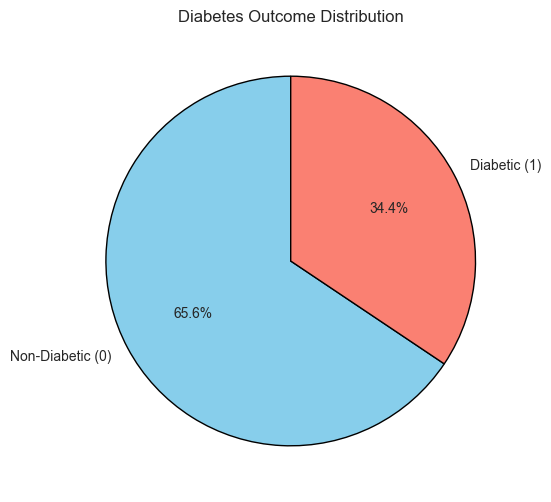

In [74]:
outcome_counts = df["Outcome"].value_counts()


colors = ["skyblue", "salmon"]
labels = ["Non-Diabetic (0)", "Diabetic (1)"]

# Creating pie chart
plt.figure(figsize=(6,6))
plt.pie(outcome_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Diabetes Outcome Distribution")
plt.show()

* As we could see that the data is imbalanced.
* Patients those who have diabetes are 34.5%.
* Patient those who does not have diabetes are 65.6%.
* The ratio between the Diabetes and Non-Diabetes is 1:3.

### Distribution and Skewness Using Histogram Plot before Imputation

**Dropping the Column Id from the original Dataframe df for further visualization** 

In [75]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# df.drop(columns=['Id'], inplace=True)

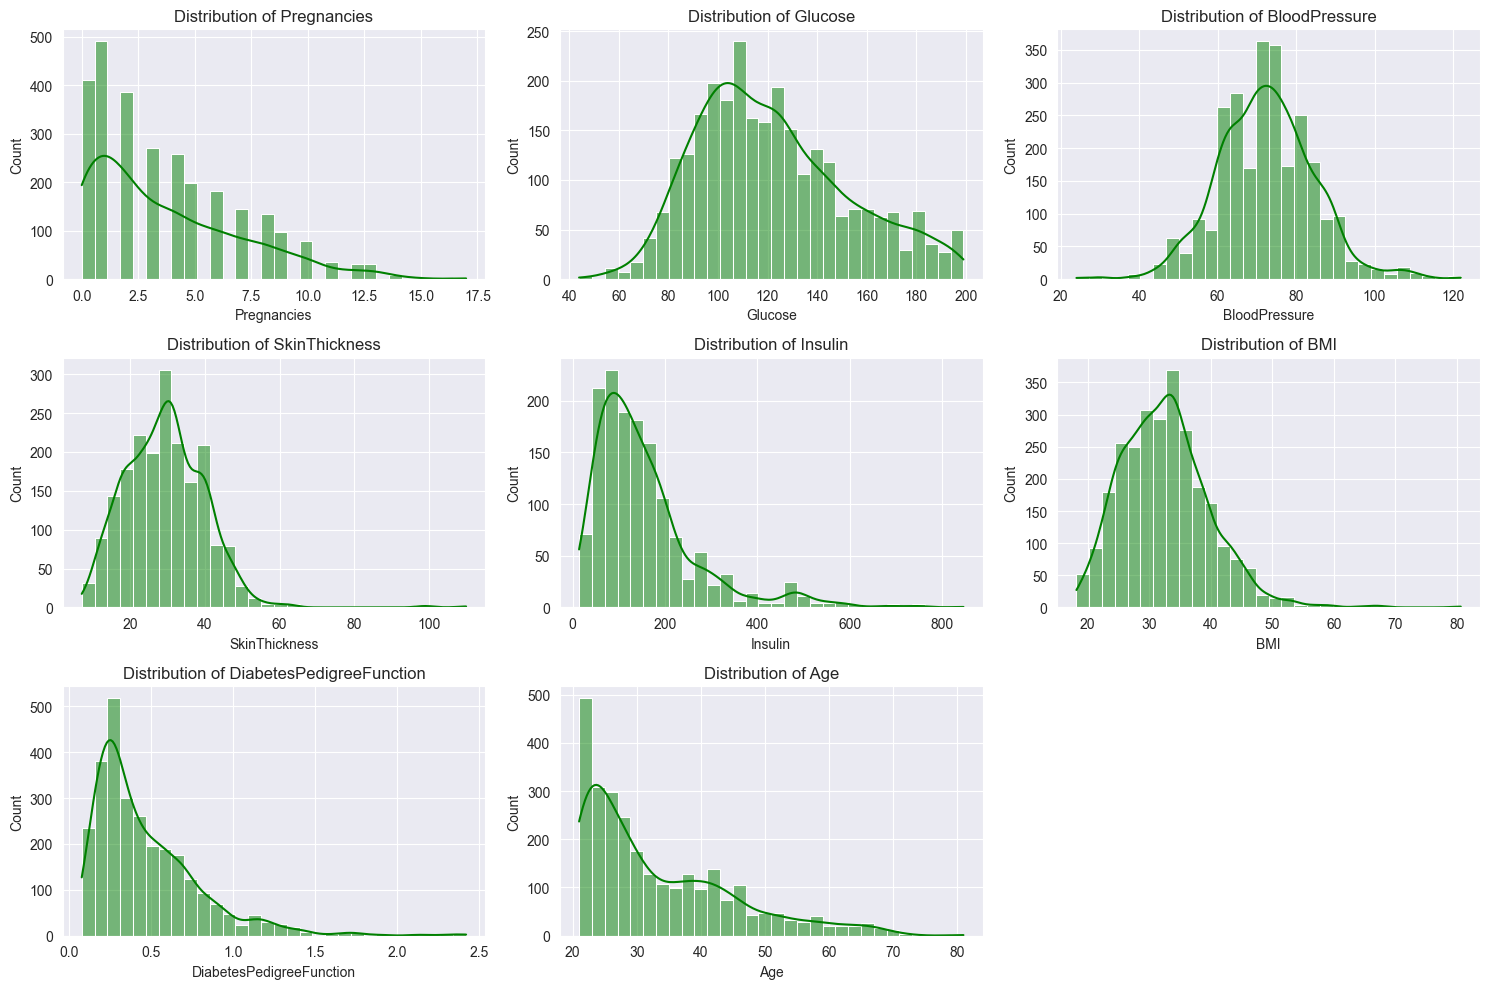

In [76]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='green')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### **Inference**
* Pregnancy column has data in whole numbers since it is the child's count
* Other columns are mostly distributed nearly nomally distributed.


### Distribution and Skewness Using Histogram & KDE Plot after MICE Imputation

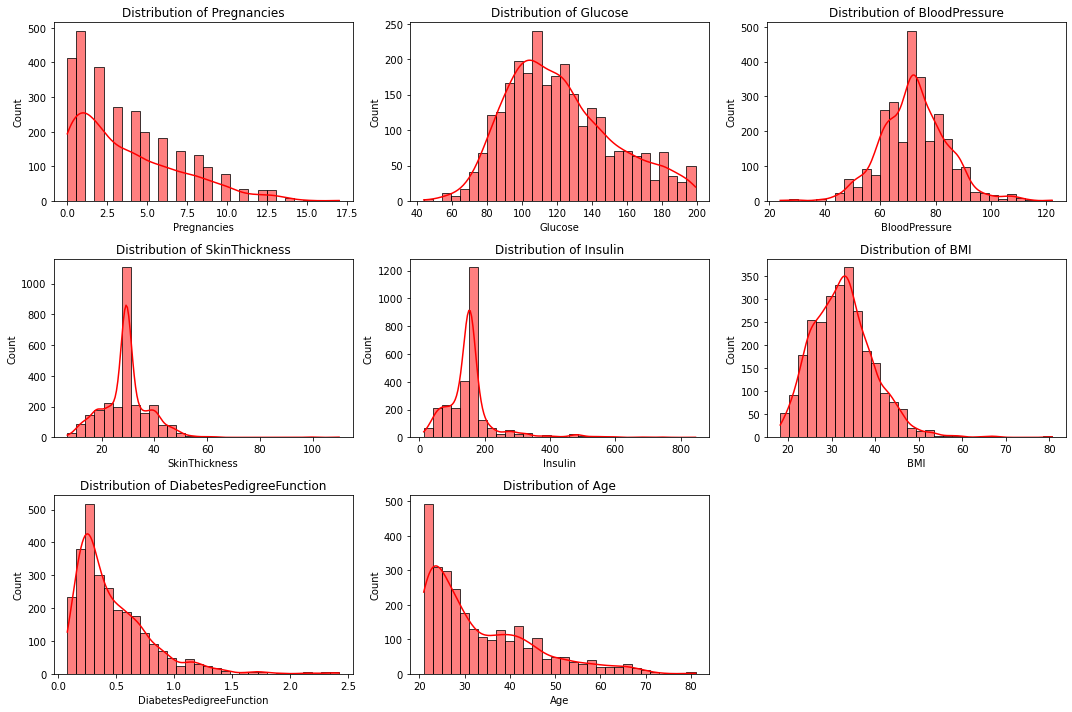

In [76]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_mice_imputed[col], kde=True, bins=30, color='red')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### KDE Before Imputation

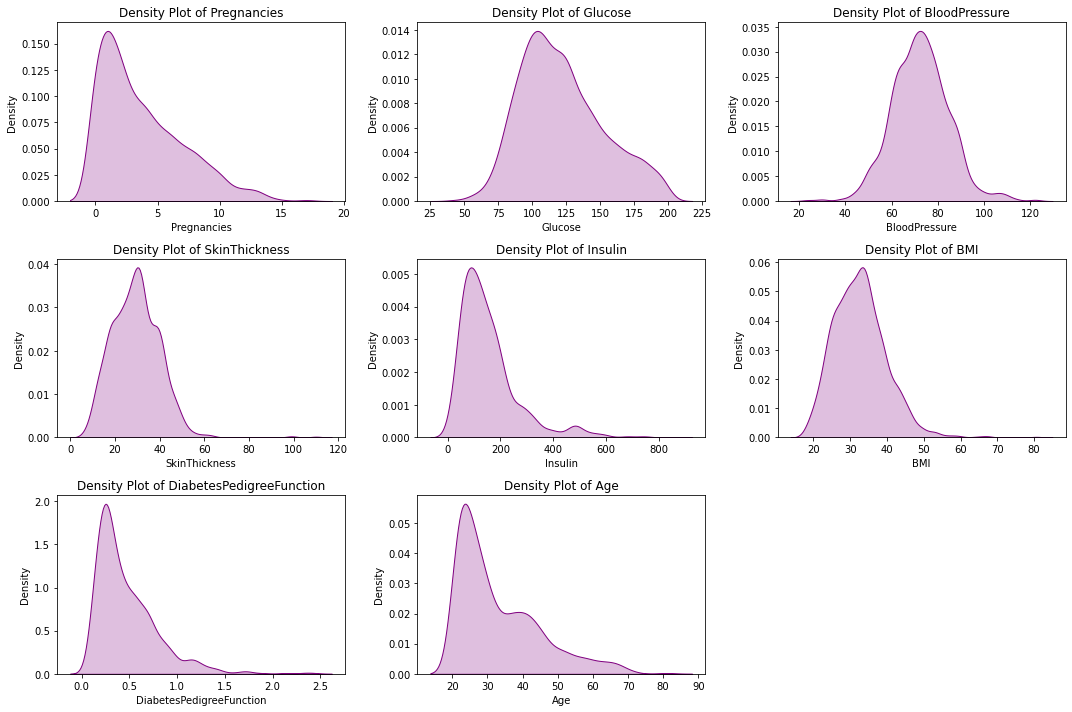

In [77]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df, x=col, fill=True, color='purple')
    plt.title(f"Density Plot of {col}")
plt.tight_layout()
plt.show()

### KDE after Imputation

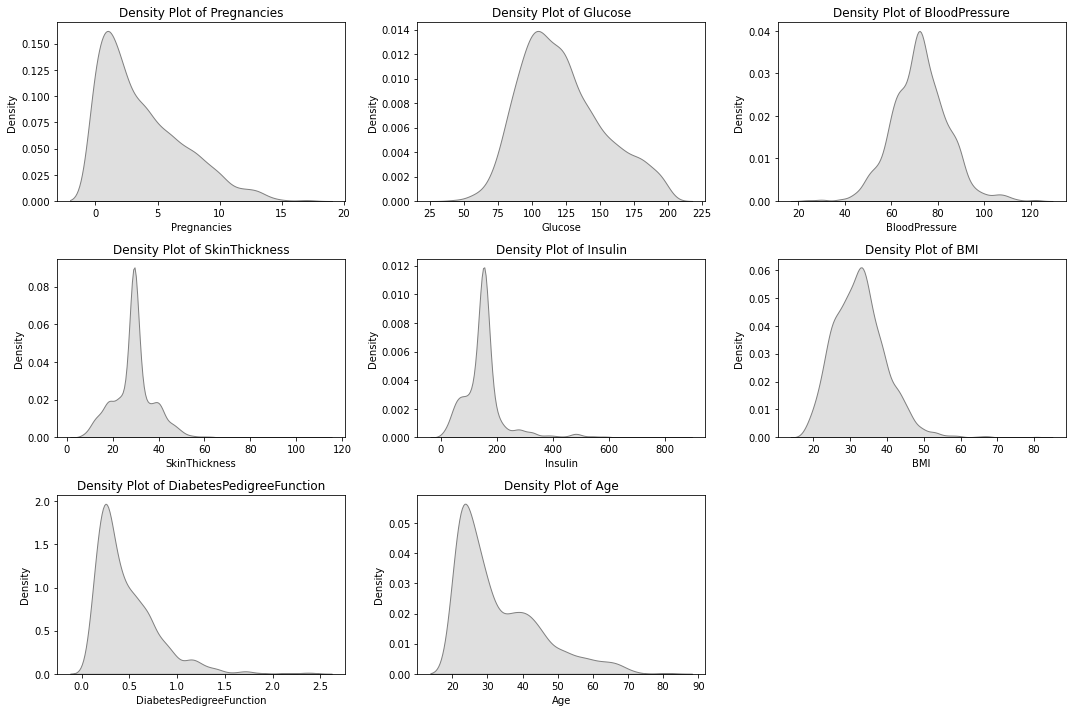

In [86]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df_mice_imputed, x=col, fill=True, color='grey')
    plt.title(f"Density Plot of {col}")
plt.tight_layout()
plt.show()

### Violin Plot Before Imputation along with Quartiles

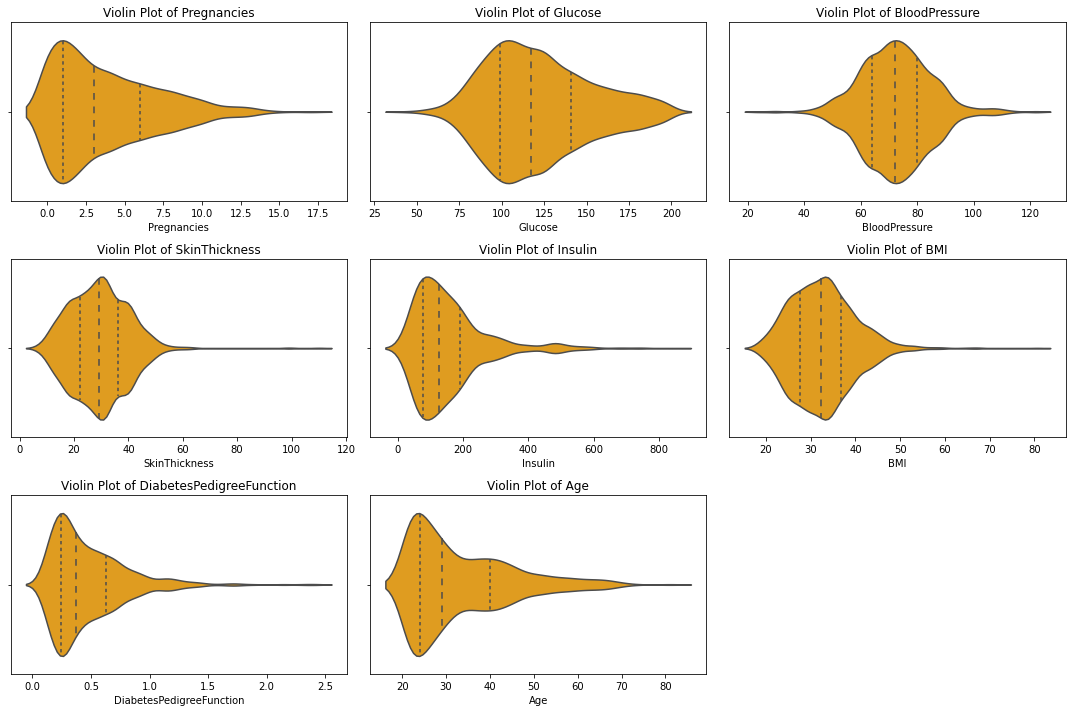

In [87]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(data=df, x=col, inner="quartile", color='orange')
    plt.title(f"Violin Plot of {col}")
plt.tight_layout()
plt.show()

### Violin Plot after Imputation along with Quartiles

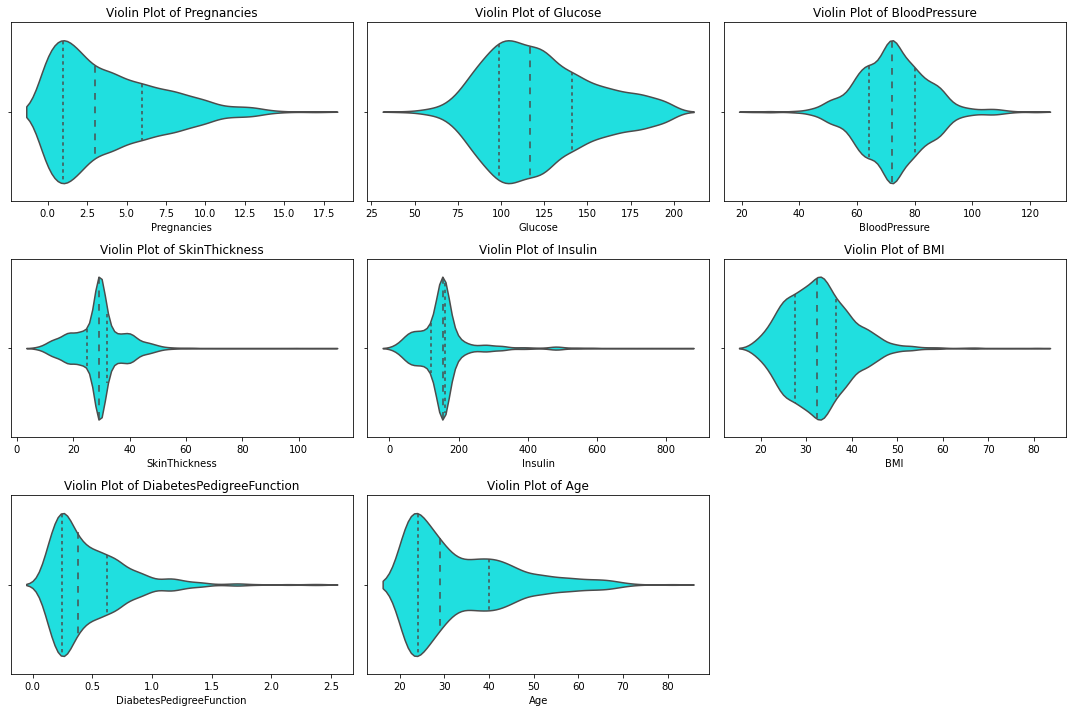

In [82]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(data=df_mice_imputed, x=col, inner="quartile", color='cyan')
    plt.title(f"Violin Plot of {col}")
plt.tight_layout()
plt.show()

## Distribution Check Against Target Variable

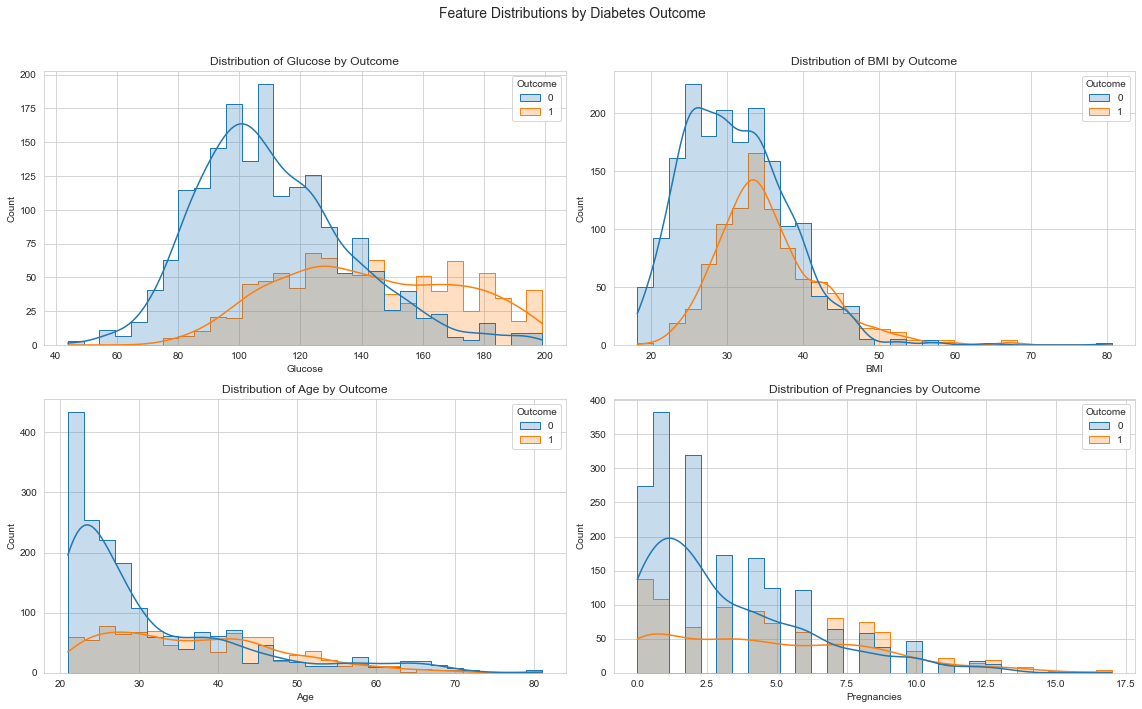

In [162]:
features_to_plot = ["Glucose", "BMI", "Age", "Pregnancies"]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Feature Distributions by Diabetes Outcome", fontsize=14)

for ax, feature in zip(axes.flatten(), features_to_plot):
    sns.histplot(df, x=feature, hue="Outcome", kde=True, element="step", bins=30, ax=ax)
    ax.set_title(f"Distribution of {feature} by Outcome", fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Box Plot For Outlier before imputing

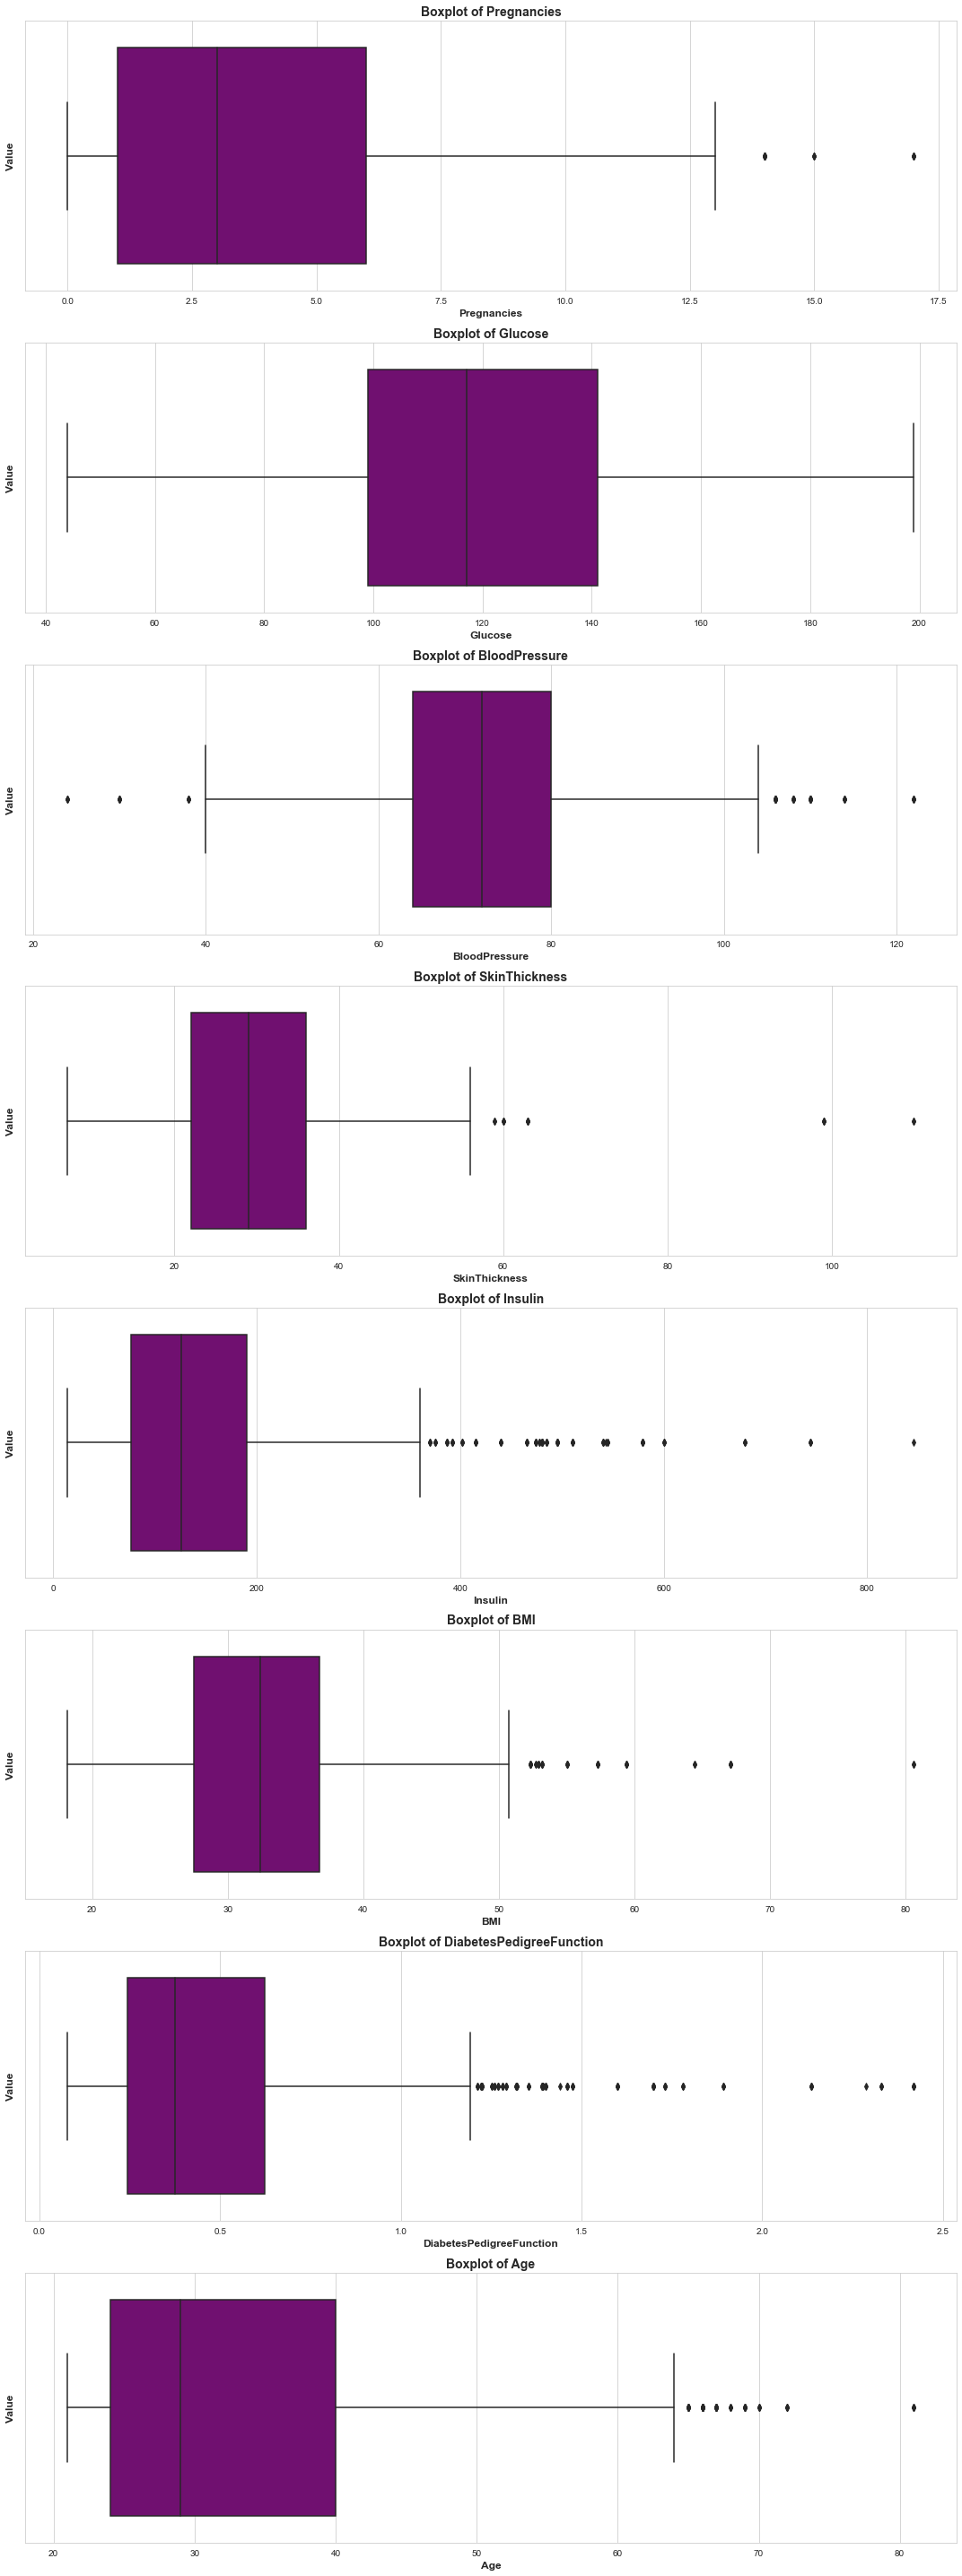

In [103]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, len(numerical_cols) * 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(data=df, x=col, color='purple')

    plt.title(f"Boxplot of {col}", fontsize=14, fontweight='bold')
    
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Value', fontsize=12, fontweight='bold')

plt.tight_layout()

plt.show()

### Box Plot For Outlier after imputing

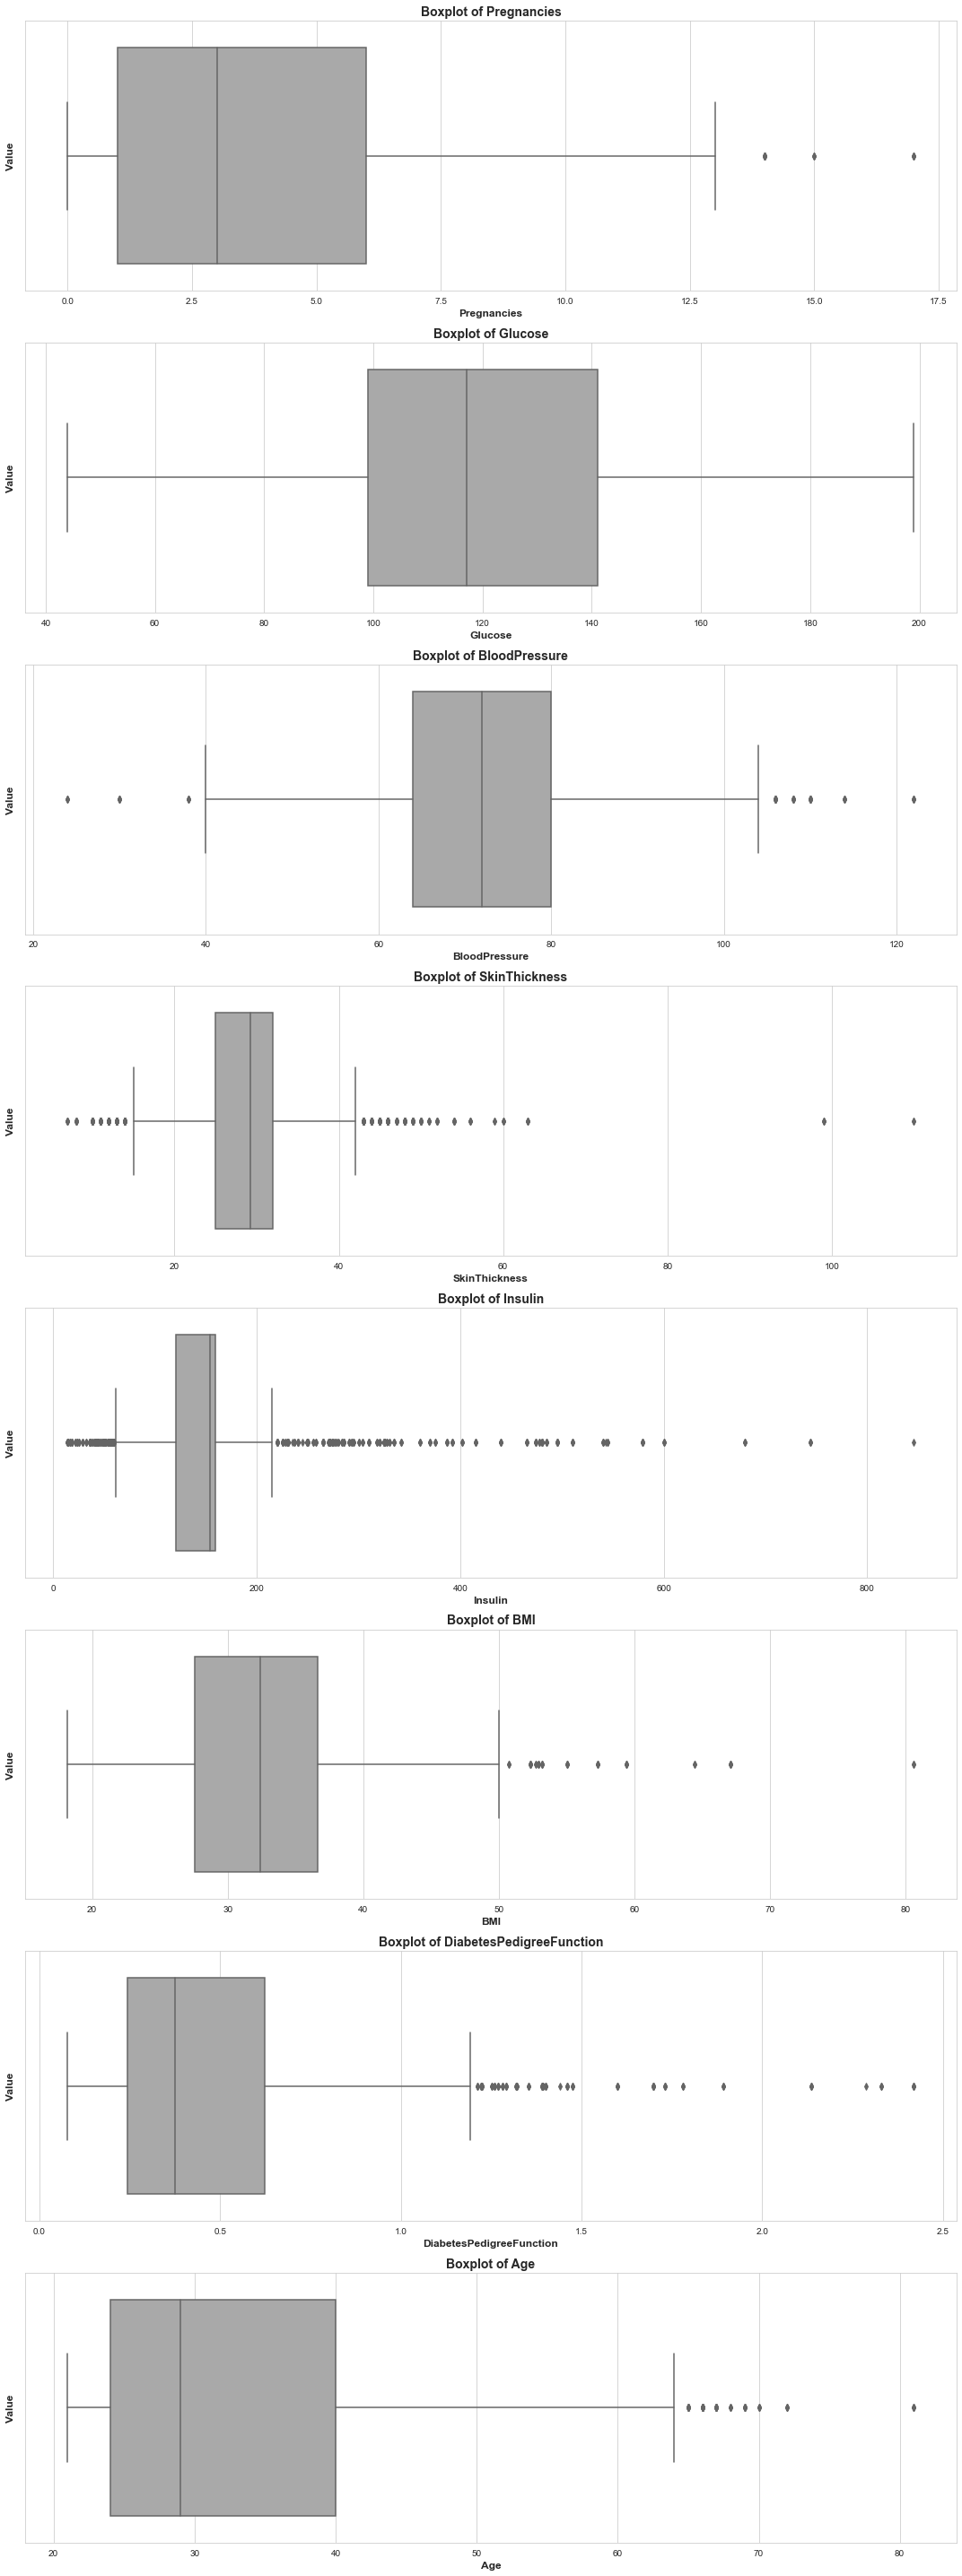

In [102]:
plt.figure(figsize=(15, len(numerical_cols) * 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(data=df_mice_imputed, x=col, color='darkgrey')
    
    plt.title(f"Boxplot of {col}", fontsize=14, fontweight='bold')

    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Value', fontsize=12, fontweight='bold')

plt.tight_layout()

plt.show()

## Bi Variate Analysis - Continuous variable vs Continuous Variable

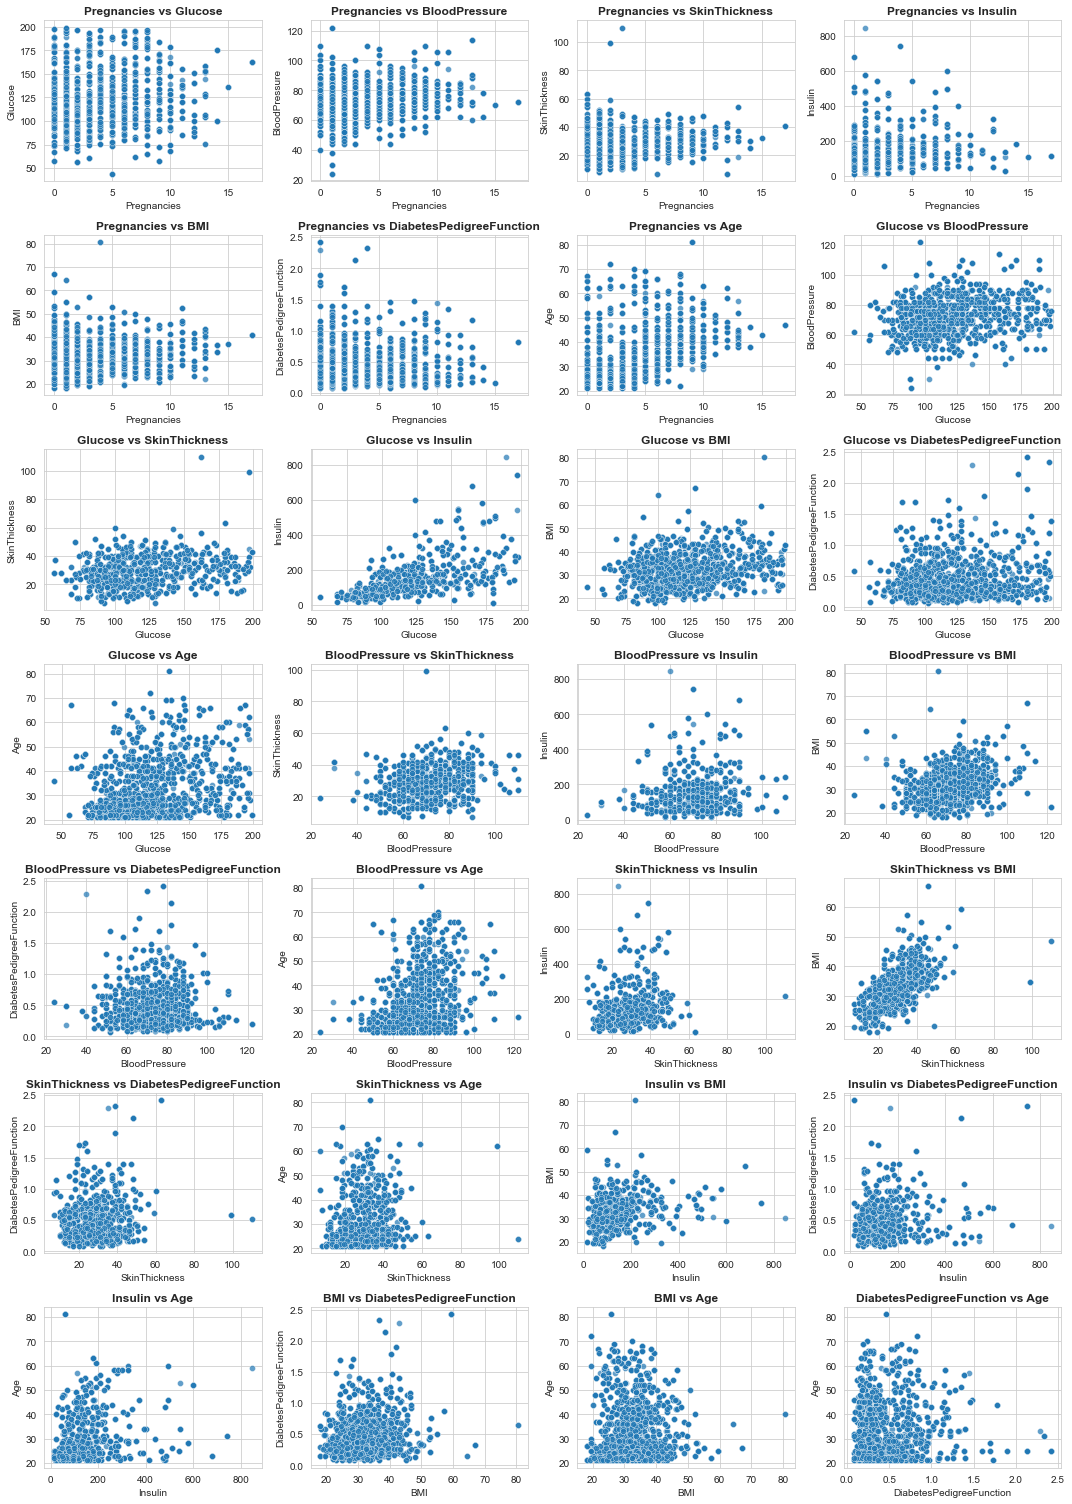

In [148]:
pairs = list(itertools.combinations(numerical_cols, 2))

num_pairs = len(pairs)
rows = (num_pairs // 4) + (num_pairs % 4 > 0)
cols = min(4, num_pairs)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()

for i, (col1, col2) in enumerate(pairs):
    sns.scatterplot(data=df, x=col1, y=col2, alpha=0.7, palette="bwr", ax=axes[i], )
    axes[i].set_title(f"{col1} vs {col2}", fontweight='bold')
    axes[i].set_xlabel(col1)
    axes[i].set_ylabel(col2)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Bi Variate Analysis - Continuous vs Target Variable

## Box Plot Before Imputating

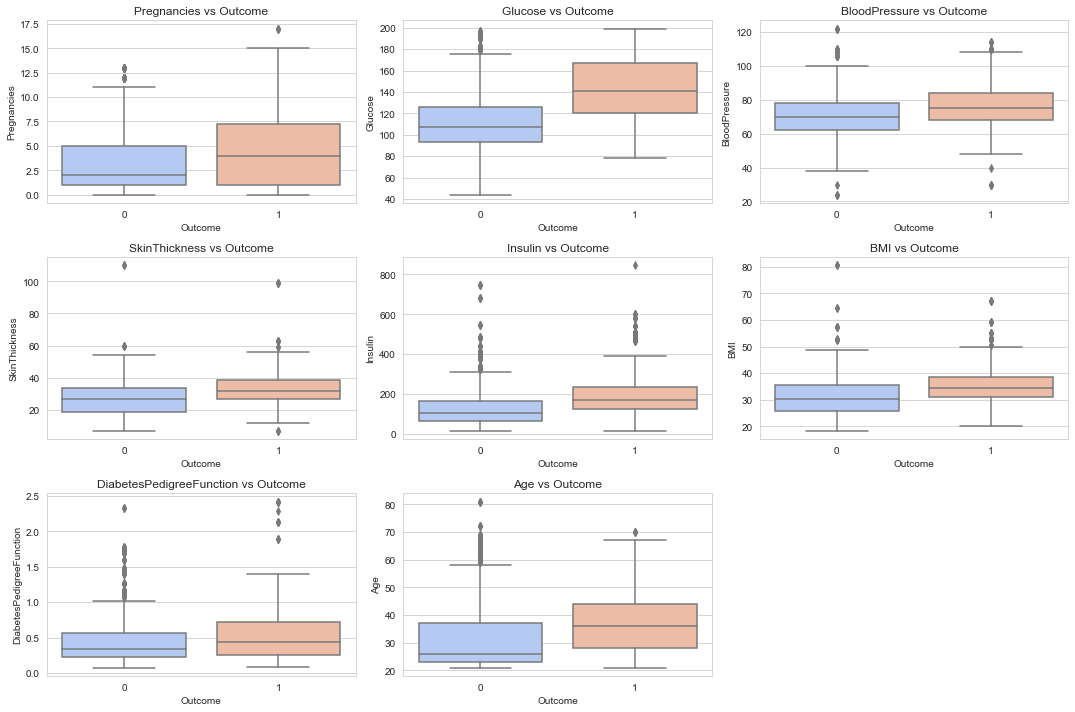

In [104]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df["Outcome"], y=df[col], palette="coolwarm")
    plt.title(f"{col} vs Outcome")
plt.tight_layout()
plt.show()

## Box Plot after Imputating

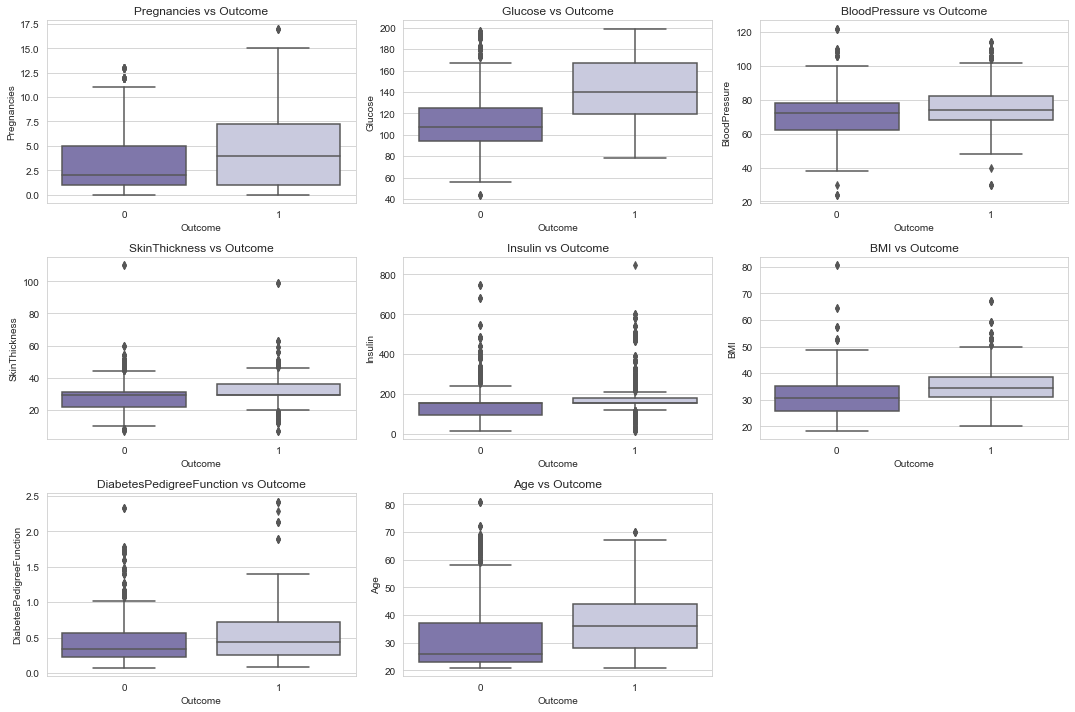

In [118]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_mice_imputed["Outcome"], y=df_mice_imputed[col], palette="Purples_r")
    plt.title(f"{col} vs Outcome", fontweight='bold')
plt.tight_layout()
plt.show()

## Violin Plot Before Imputation

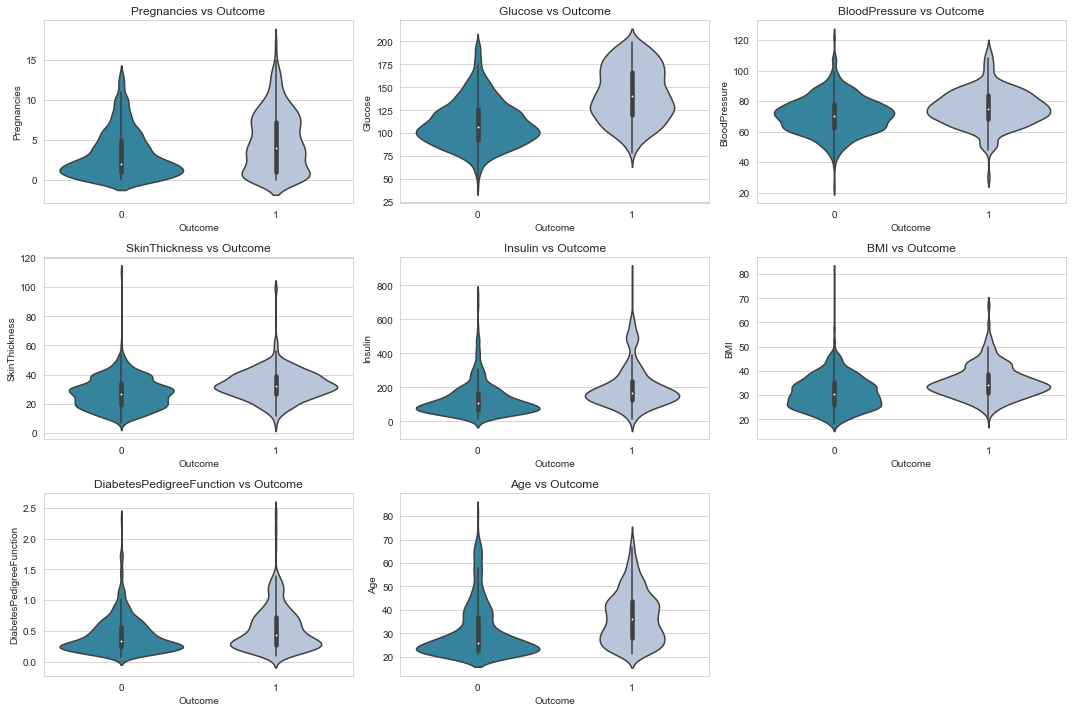

In [122]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x=df["Outcome"], y=df[col], palette="PuBuGn_r")
    plt.title(f"{col} vs Outcome", fontweight='bold')
plt.tight_layout()
plt.show()

## Violin Plot After Imputation

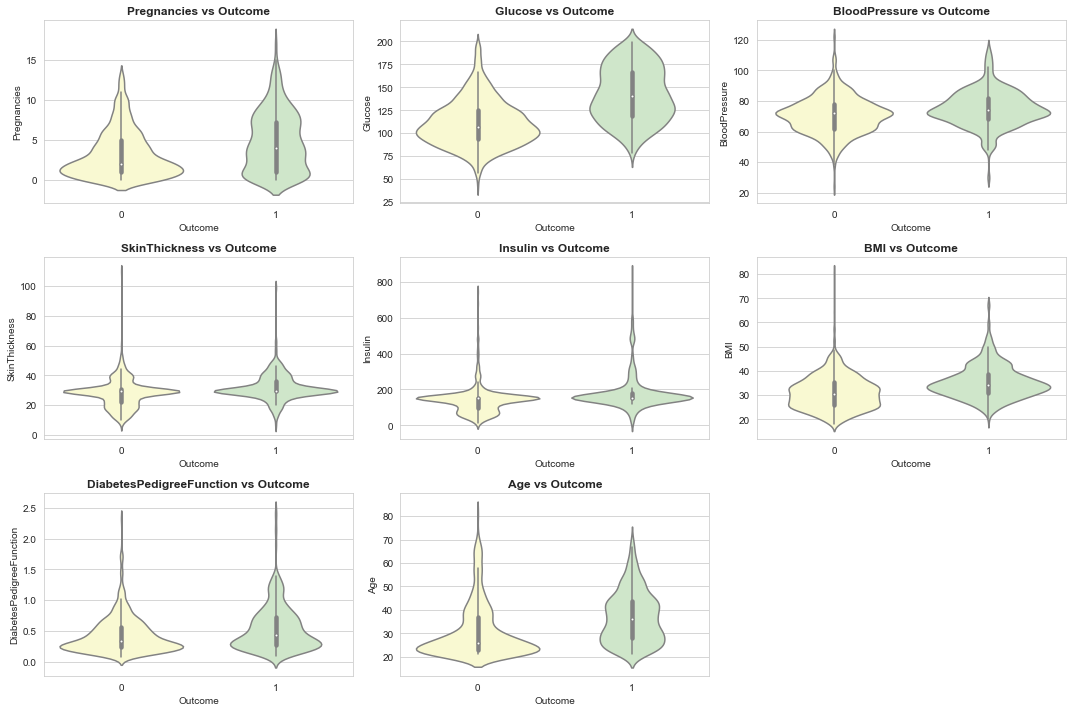

In [168]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x=df_mice_imputed["Outcome"], y=df_mice_imputed[col], palette="Pastel1_r")
    plt.title(f"{col} vs Outcome", fontweight='bold')
plt.tight_layout()
plt.show()

### NUM VS NUM PLOT - Scatter Plot

### Heatmap Prior Imputation

Text(0.5, 1.0, 'Correlation Plot before Imputation')

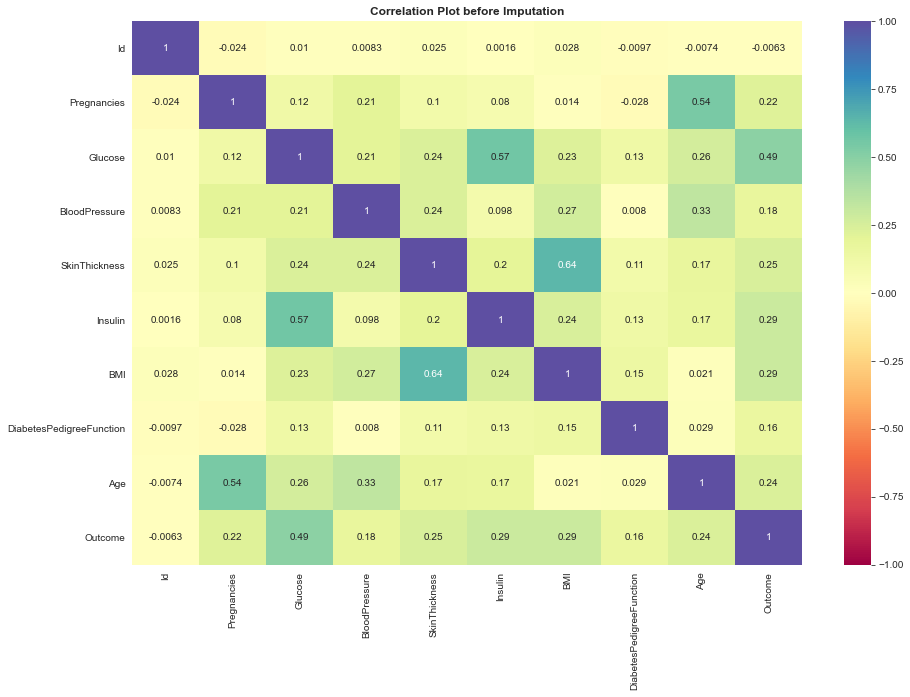

In [149]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=+1)
plt.title("Correlation Plot before Imputation", fontweight='bold')

### Heatmap After Imputation

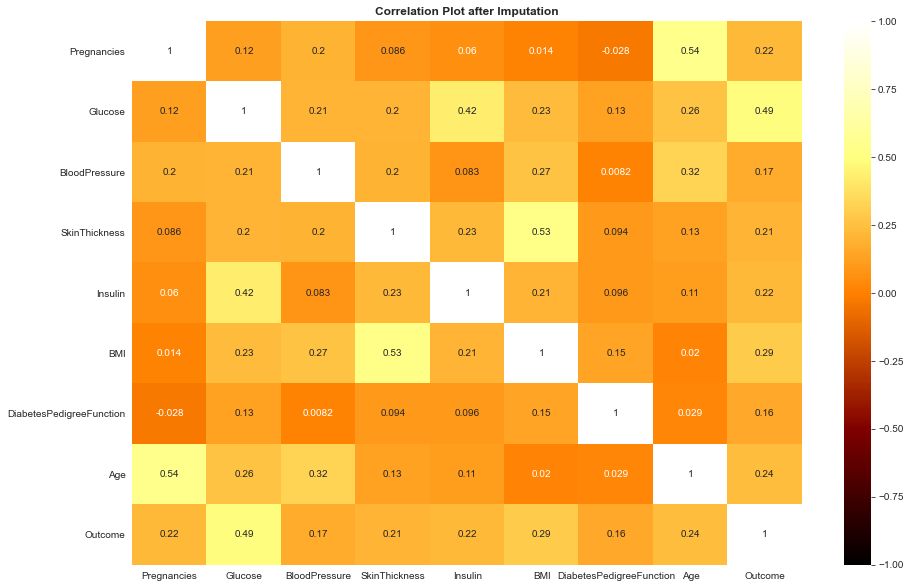

In [151]:
plt.figure(figsize=(15,10))
sns.heatmap(df_mice_imputed.corr(), annot=True, cmap="afmhot", vmin=-1, vmax=+1)
plt.title("Correlation Plot after Imputation", fontweight='bold')
plt.show()

### MultiVariate Analysis:

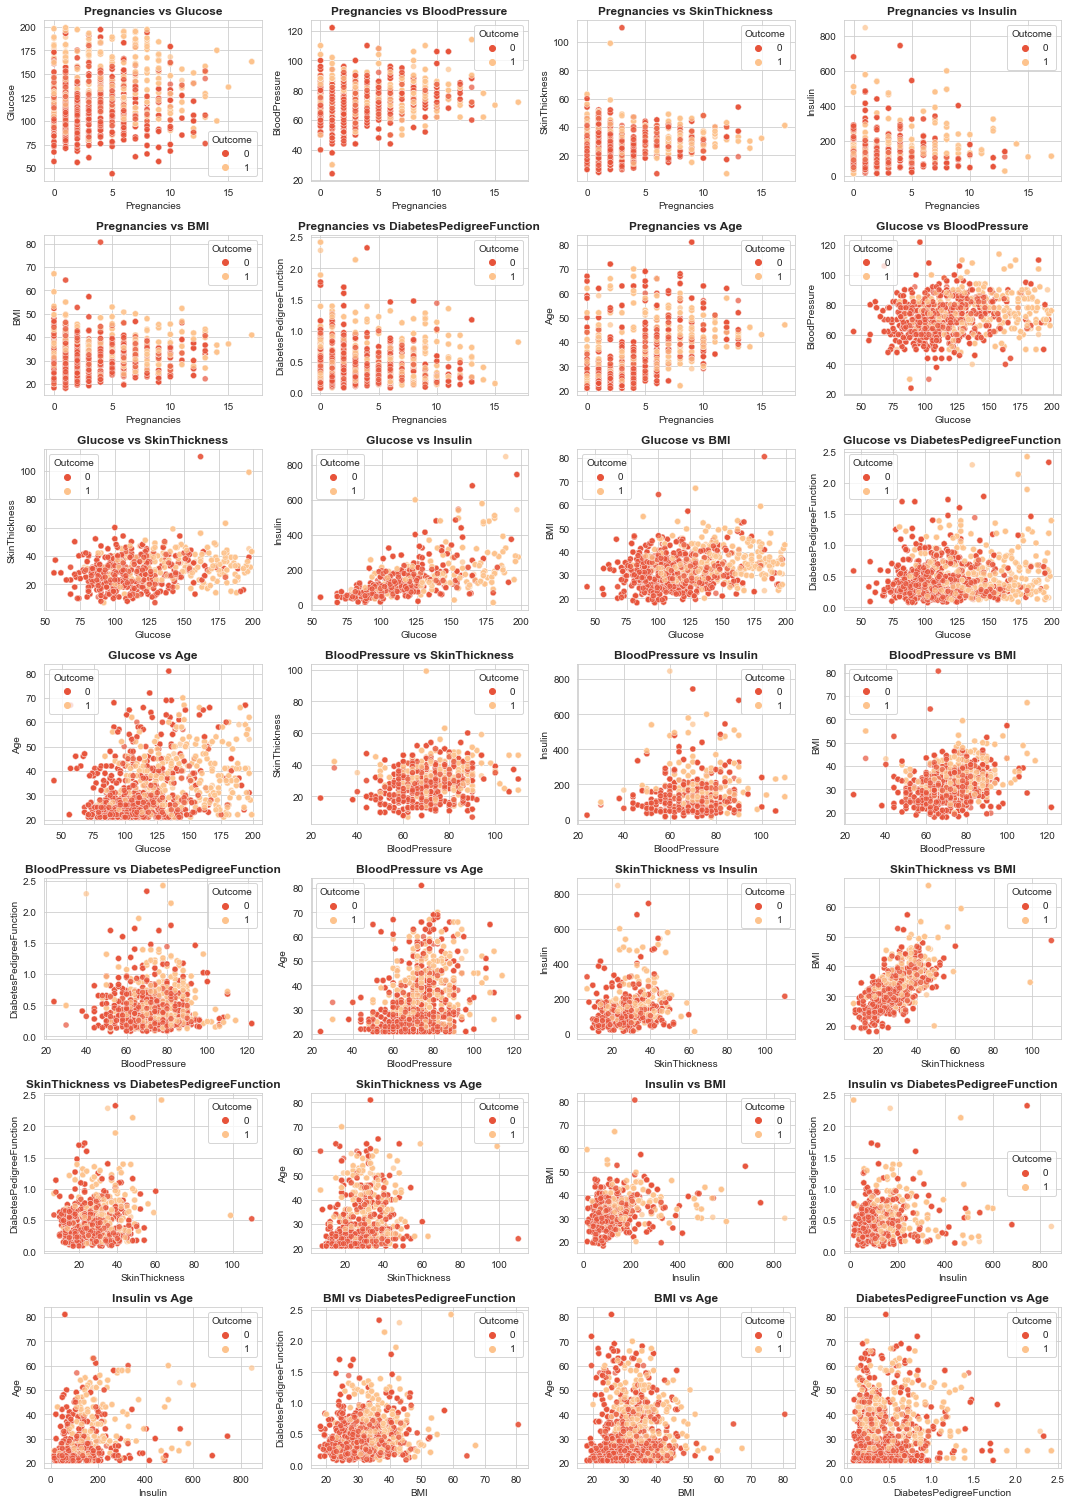

In [157]:
pairs = list(itertools.combinations(numerical_cols, 2))

num_pairs = len(pairs)
rows = (num_pairs // 4) + (num_pairs % 4 > 0)
cols = min(4, num_pairs)

# Create subplots dynamically
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()

for i, (col1, col2) in enumerate(pairs):
    sns.scatterplot(data=df, x=col1, y=col2, alpha=0.7, hue='Outcome', palette="OrRd_r", ax=axes[i], )
    axes[i].set_title(f"{col1} vs {col2}", fontweight='bold')
    axes[i].set_xlabel(col1)
    axes[i].set_ylabel(col2)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### PairPlot With Regression Line

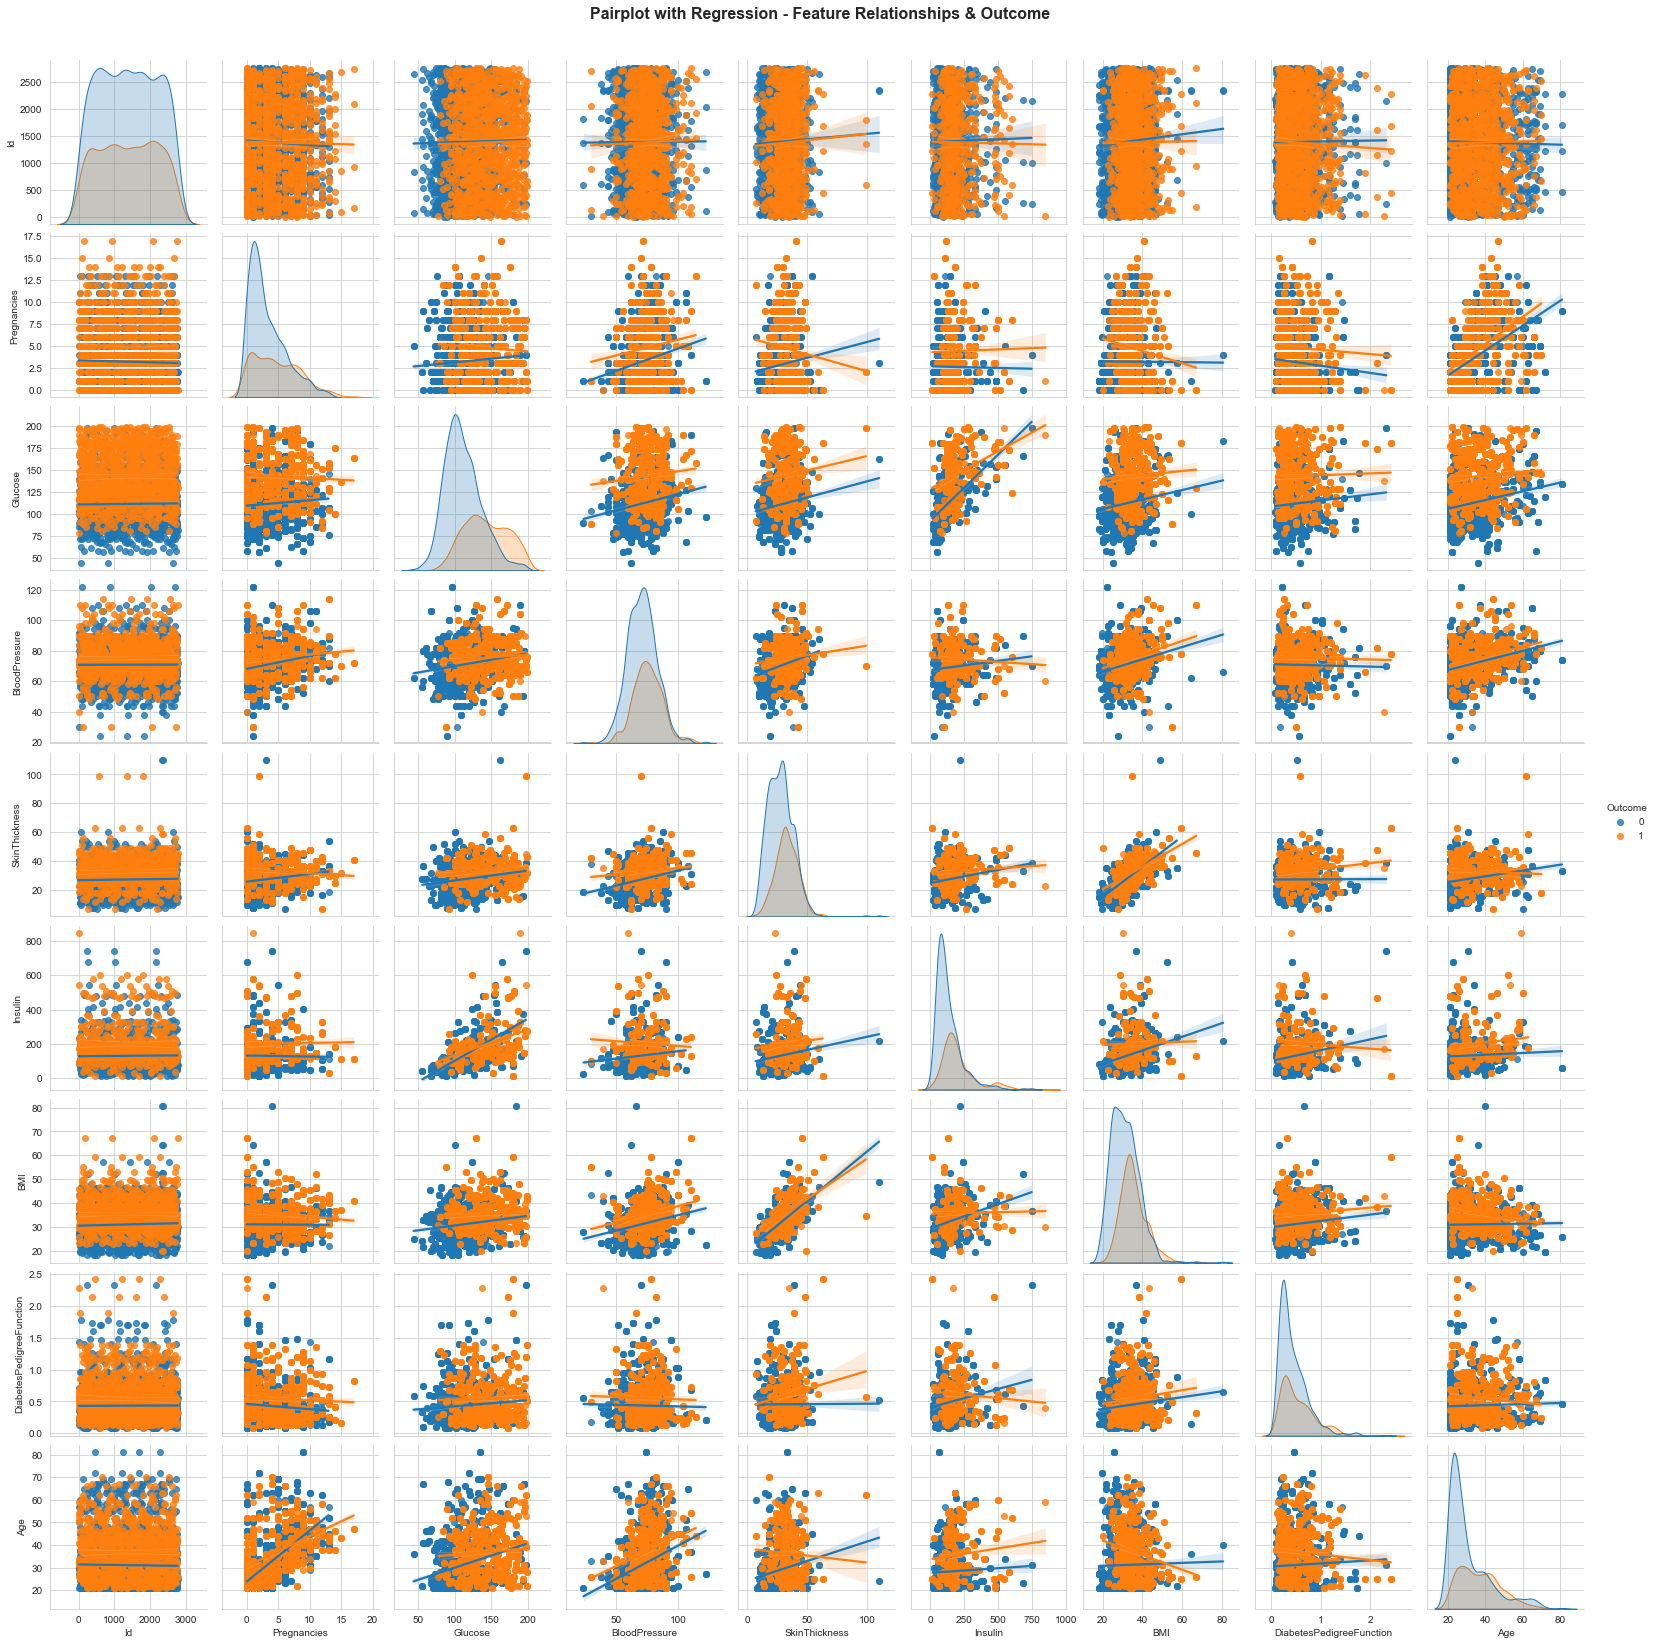

In [170]:
pairplot = sns.pairplot(df, hue="Outcome", kind="reg", diag_kind="kde")

plt.suptitle("Pairplot with Regression - Feature Relationships & Outcome", fontsize=16, fontweight="bold", y=1.02)

plt.show()

### Advanced Visualization

### Hist & Box Plot Integrated

In [191]:
df_mice_imputed.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [187]:
def histplot_boxplot(data, feature, figsize=(12,7), bins=30):  # Default bins=30
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )

    # Boxplot
    sns.boxplot(data=data, x=feature, showmeans=True, color="violet", ax=ax_box)
    
    # Histogram
    sns.histplot(data=data, x=feature, bins=bins, color="#4682B4", edgecolor="black", alpha=0.7, ax=ax_hist)

    # Mean & Median Lines
    ax_hist.axvline(data[feature].mean(), linestyle="--", color="green", label=f"Mean: {data[feature].mean():.2f}")
    ax_hist.axvline(data[feature].median(), linestyle="-", color="black", label=f"Median: {data[feature].median():.2f}")

    ax_hist.legend()  # Show mean/median legend
    ax_box.set_title(f"Boxplot of {feature}", fontweight="bold")
    ax_hist.set_title(f"Histogram of {feature}", fontweight="bold")

    plt.show()

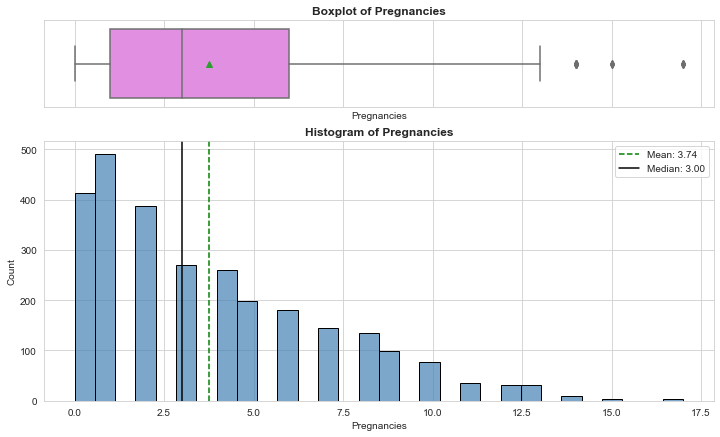

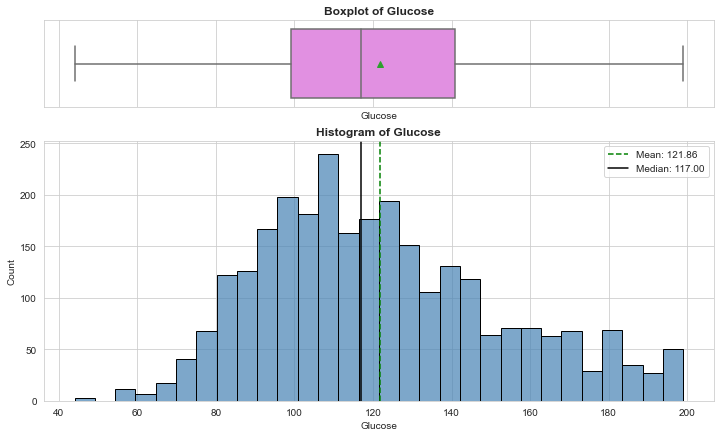

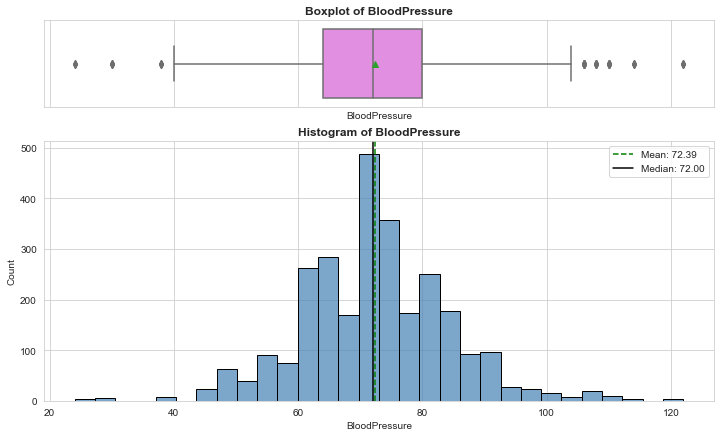

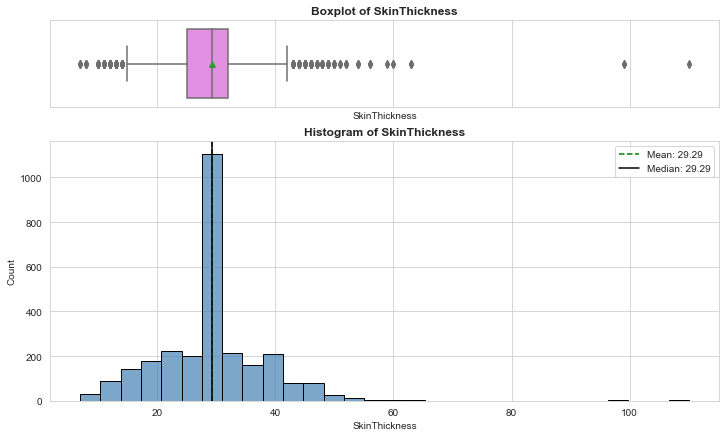

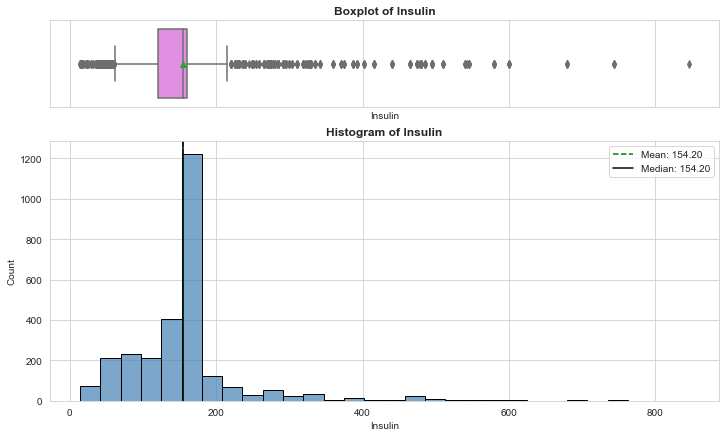

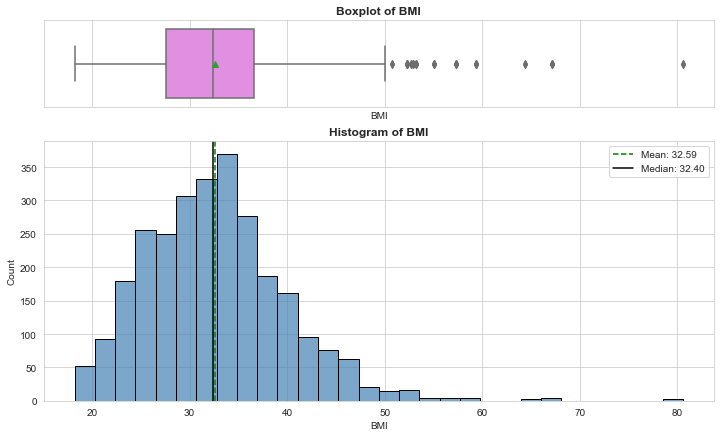

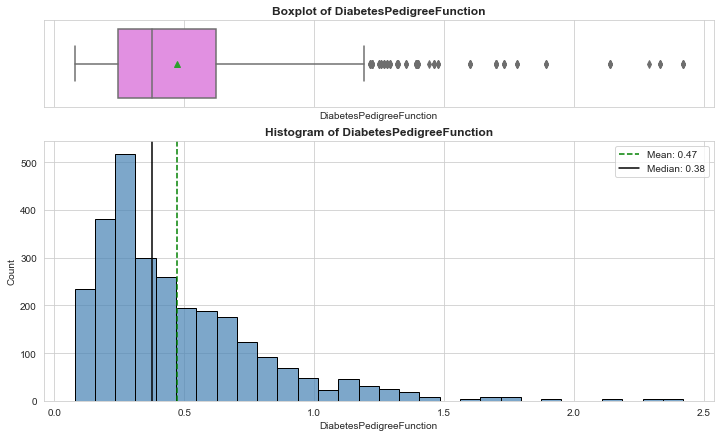

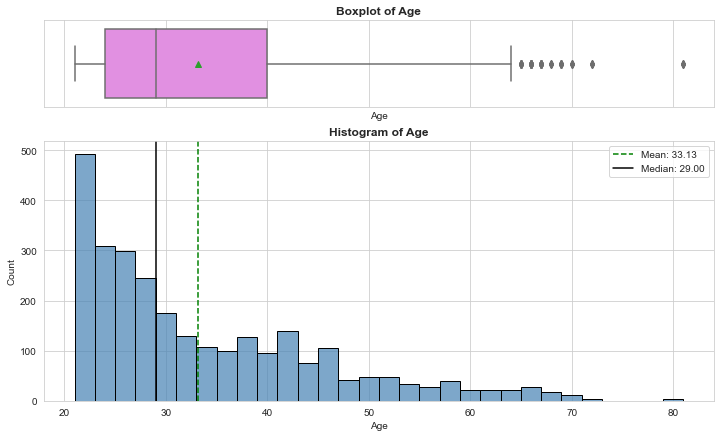

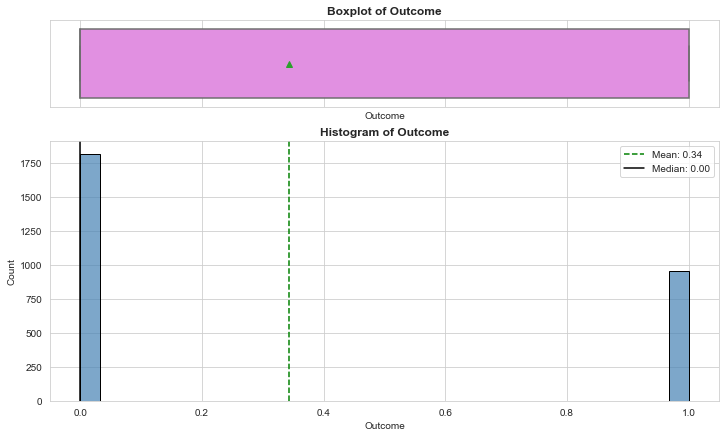

In [192]:
for col in df_mice_imputed.select_dtypes(exclude="O").columns:
    histplot_boxplot(data=df_mice_imputed, feature=col, bins=30)  # Pass bins explicitly
    plt.show()

### Line Scatter Integrated

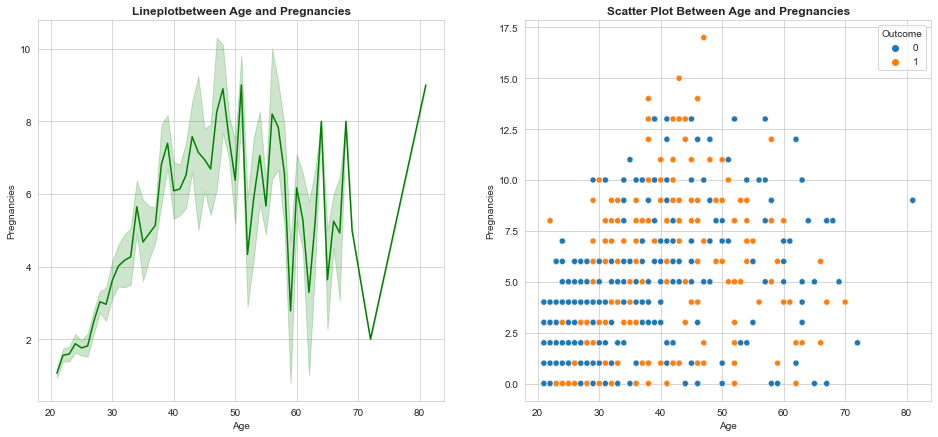

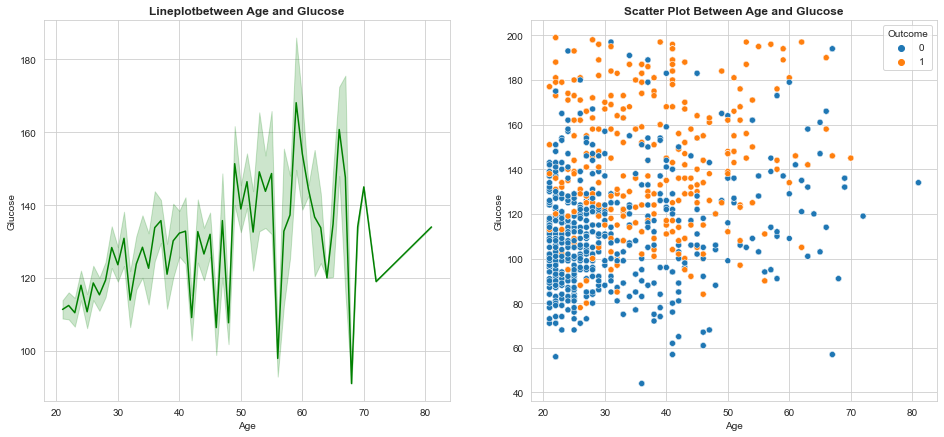

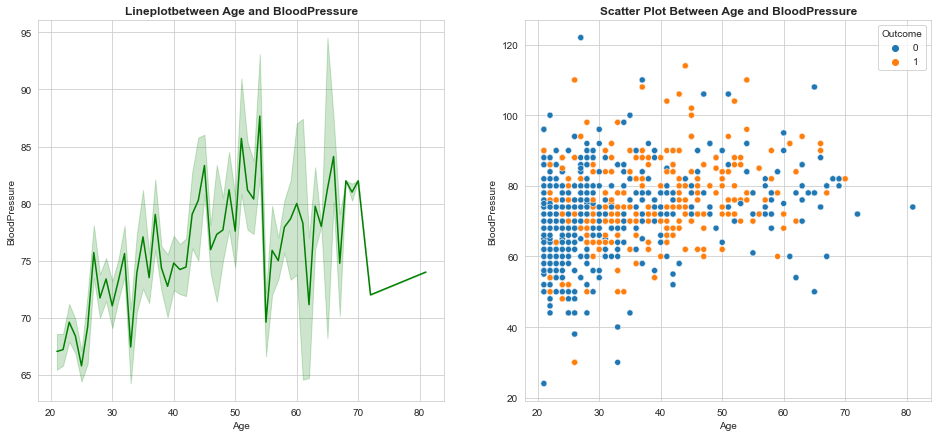

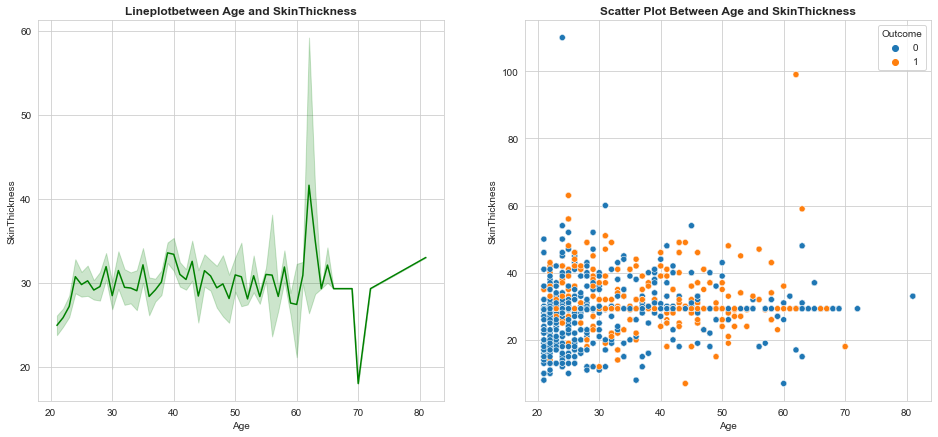

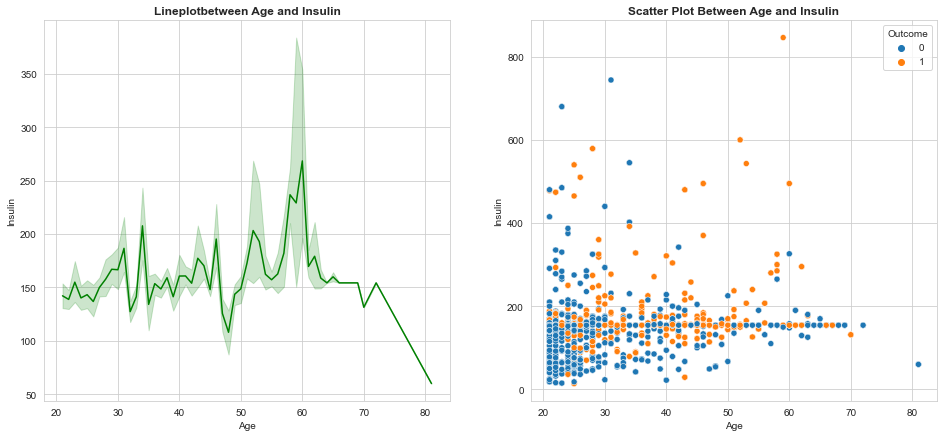

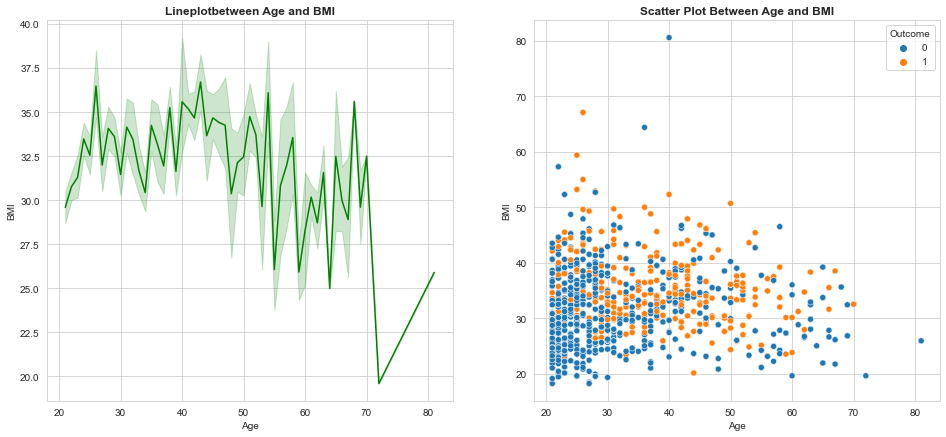

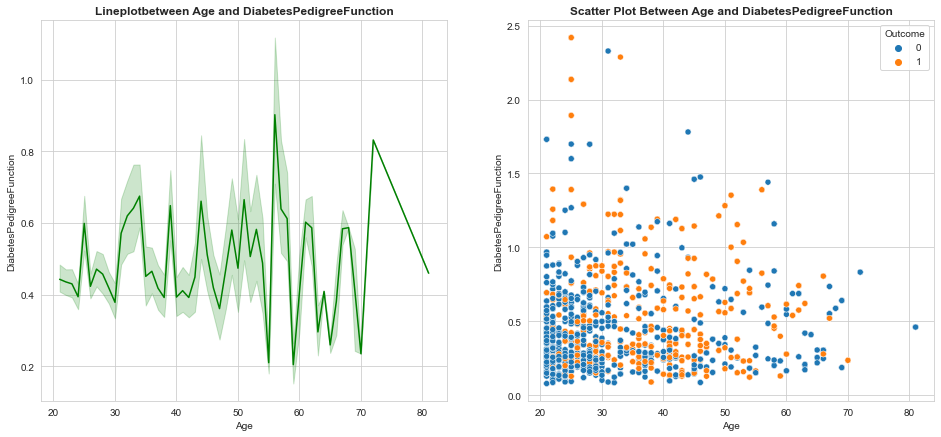

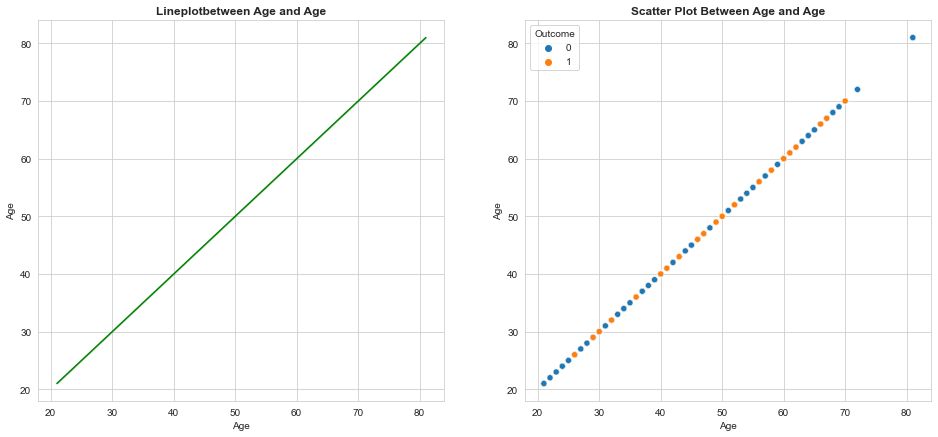

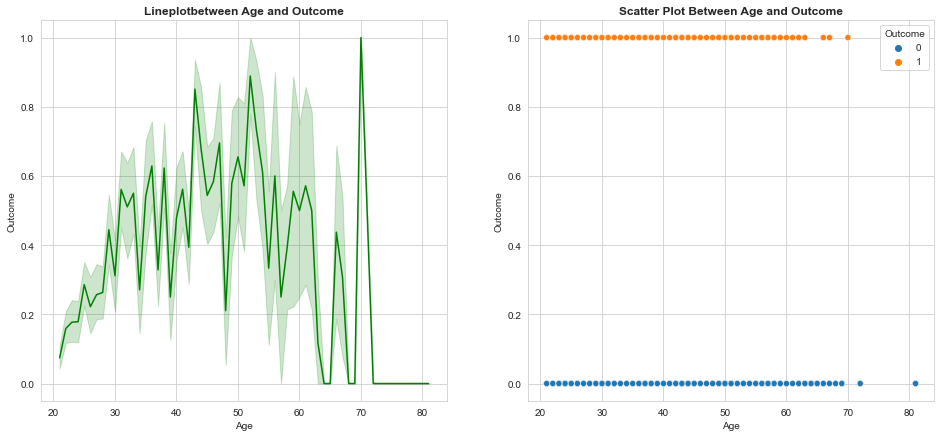

In [198]:
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color="green")
    plt.title("Lineplotbetween {0} and {1}".format(feature1, feature2), fontweight="bold")
    
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color="orange", hue="Outcome")
    plt.title("Scatter Plot Between {0} and {1}".format(feature1, feature2), fontweight="bold")
    plt.show()

for col in df_mice_imputed.select_dtypes(exclude="O").columns:
    lineplot_scatterplot(data=df_mice_imputed, feature1="Age", feature2=col)

# Transform Skewed Data

In [199]:
skewed_cols = df_mice_imputed.skew().sort_values(ascending=False)
print("Highly Skewed Features:\n", skewed_cols[skewed_cols > 1])

Highly Skewed Features:
 Insulin                     2.701433
DiabetesPedigreeFunction    1.842791
Age                         1.166299
SkinThickness               1.163227
dtype: float64


## **Selecting Transformations for the respective Variables**

### **Using Log transformation for highly skewed variables Insulin, DiabetesPedigreeFunction**
### **Using Square root transformation for moderately skewed variables Age SkinThickness**

**Use log1p() for Insulin & DiabetesPedigreeFunction (high skew).
Use sqrt() for Age & SkinThickness (moderate skew).
Consider Box-Cox for DiabetesPedigreeFunction if all values are > 0.
IT is recommended to always check the distribution after transformation to confirm normalization.**

**Box-Cox Transformation (Preferred)
Since Box-Cox automatically finds the best λ (lambda) transformation, it's ideal for highly skewed positive data like DiabetesPedigreeFunction (DPF).**

## Square Root Transformation: Definition & Use Cases

### Definition

The square root transformation is a mathematical technique used to reduce skewness and normalize data by applying:

$X' = \sqrt{X}$

where $X'$ is the transformed value and $X$ is the original value.


In [201]:

df_mice_imputed["Insulin"] = np.log1p(df_mice_imputed["Insulin"])

df_mice_imputed["DiabetesPedigreeFunction"], _ = boxcox(df_mice_imputed["DiabetesPedigreeFunction"])

df_mice_imputed["Age"] = np.sqrt(df_mice_imputed["Age"])
df_mice_imputed["SkinThickness"] = np.sqrt(df_mice_imputed["SkinThickness"])

In [218]:
skewed_cols

Pregnancies                 0.959096
Age                         0.879035
BMI                         0.853449
Outcome                     0.657465
Glucose                     0.521131
BloodPressure               0.197404
DiabetesPedigreeFunction    0.006891
SkinThickness              -0.017872
Insulin                    -0.765024
dtype: float64

# Distribution Plot After Transformation

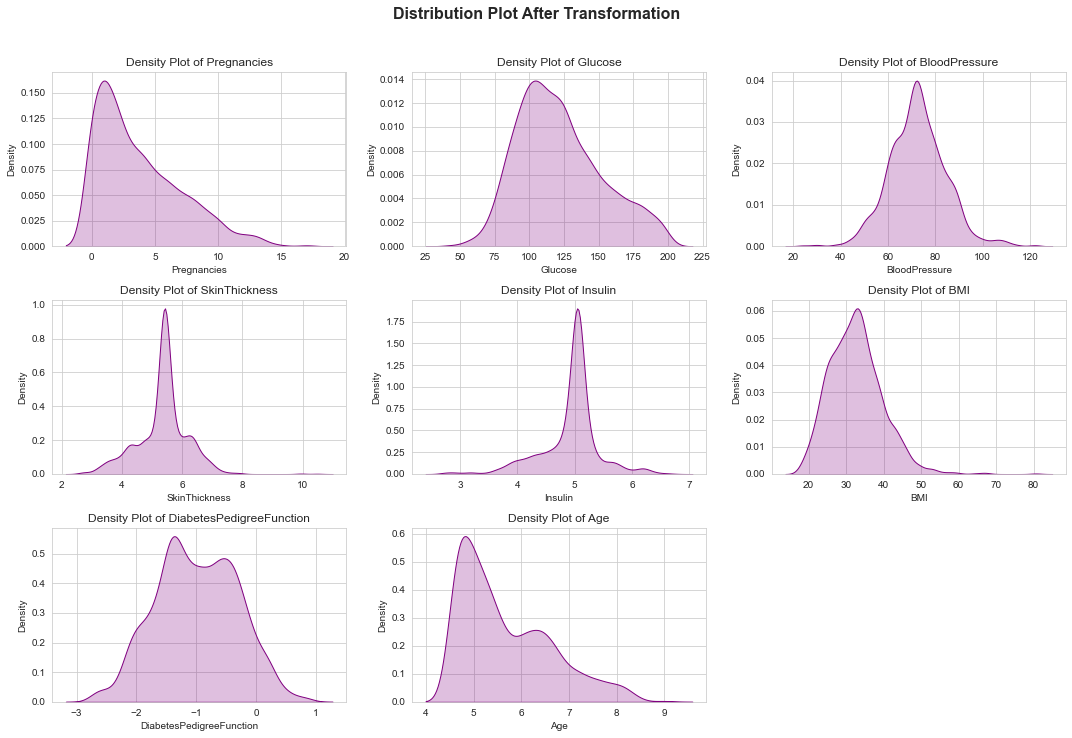

In [211]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df_mice_imputed, x=col, fill=True, color='purple')
    plt.title(f"Density Plot of {col}")

plt.suptitle("Distribution Plot After Transformation", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [217]:
skewed_cols = df_mice_imputed.skew().sort_values(ascending=False)
print("Highly Skewed Features:\n", skewed_cols[skewed_cols > 1])

Highly Skewed Features:
 Series([], dtype: float64)


## Scaling
* Done to bring down the different scalings of data features into similiar so that model can understand very well.

In [225]:
df_mice_imputed.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [227]:
scaler = StandardScaler()
numerical_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [228]:
df_mice_imputed[numerical_cols] = scaler.fit_transform(df_mice_imputed[numerical_cols])
df_mice_imputed.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.679232  0.856993      -0.032190       0.681436  0.376561  0.141662   
1    -0.825341 -1.208717      -0.532758       0.045250  0.227367 -0.843952   
2     1.281062  2.004610      -0.699614       0.077562  0.234872 -1.308598   
3    -0.825341 -1.077561      -0.532758      -0.660938 -0.734424 -0.632749   
4    -1.126256  0.496313      -2.701886       0.681436  0.403071  1.479279   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.776337  1.451029        1  
1                 -0.119494 -0.111560        0  
2                  0.881224 -0.018957        1  
3                 -1.314507 -1.135602        0  
4                  2.662714  0.072211        1

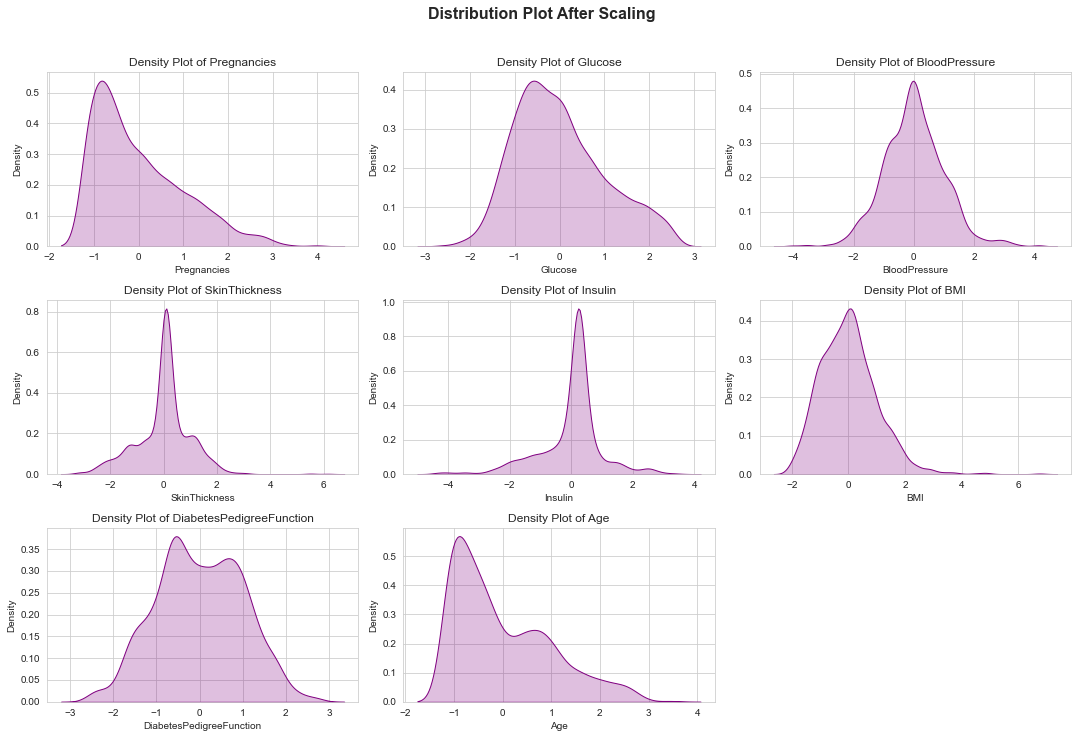

In [230]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df_mice_imputed, x=col, fill=True, color='purple')
    plt.title(f"Density Plot of {col}")

plt.suptitle("Distribution Plot After Scaling", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Feature Importance

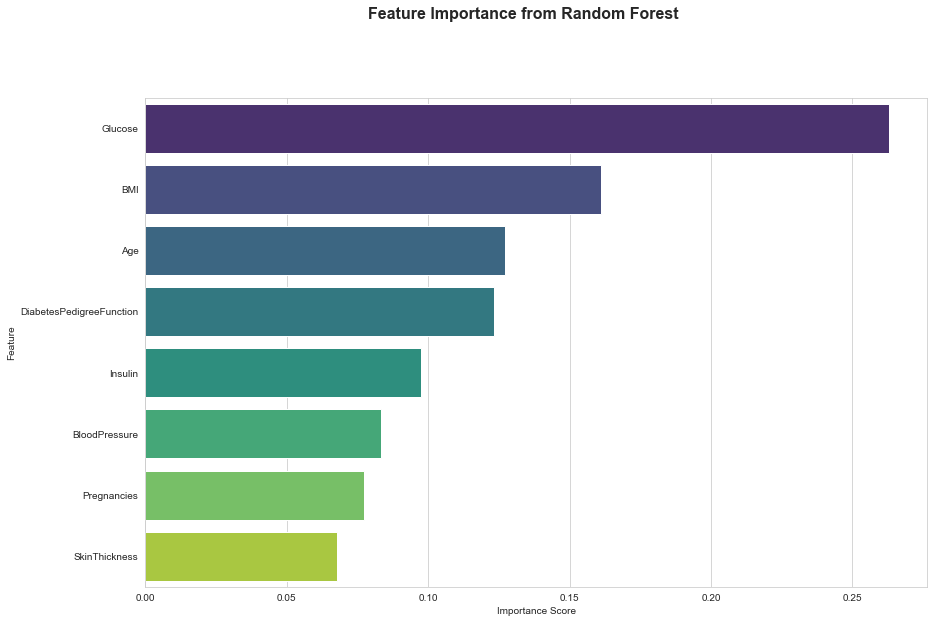

In [236]:
X = df_mice_imputed.drop(columns=["Outcome"])
y = df_mice_imputed["Outcome"]

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(14, 9))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.suptitle("Feature Importance from Random Forest", fontsize=16, fontweight='bold', y=1.02)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Check for Multicollinearity (Feature Correlation)

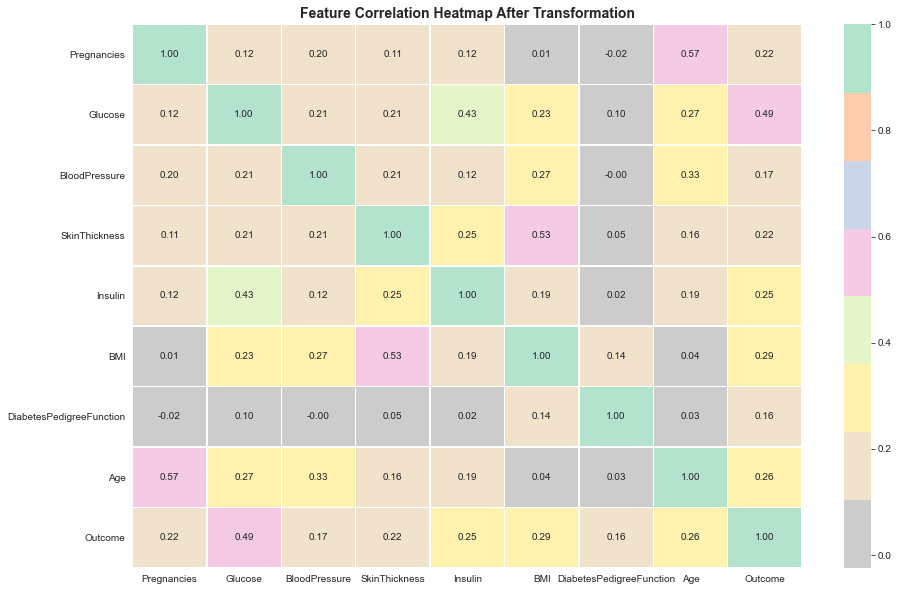

In [213]:
plt.figure(figsize=(15,10))
sns.heatmap(df_mice_imputed.corr(), annot=True, cmap="Pastel2_r", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap After Transformation", fontsize=14, fontweight='bold')
plt.show()

## VIF (Variance Inflation Factor)

In [237]:
X = df_mice_imputed.select_dtypes(exclude="O")

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                    Feature       VIF
7                       Age  1.694059
5                       BMI  1.548408
0               Pregnancies  1.495356
1                   Glucose  1.466526
3             SkinThickness  1.463423
4                   Insulin  1.276731
8                   Outcome  1.257697
2             BloodPressure  1.224277
6  DiabetesPedigreeFunction  1.042379


* As we could see above 5% is considered as highly correlated and we could see that only Age, BMI is slightly correlated.
* So lets assume that all columns are required and build the model.

### Model Data Preparation

In [241]:
X = df_mice_imputed.drop(columns='Outcome')
y = df_mice_imputed['Outcome']

In [242]:
# adding constant for intercept 
X = sm.add_constant(X)

### Train Test Split

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Base Model Without RFE

In [244]:
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.467674
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 2214
Model:                          Logit   Df Residuals:                     2205
Method:                           MLE   Df Model:                            8
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                  0.2745
Time:                        14:44:40   Log-Likelihood:                -1035.4
converged:                       True   LL-Null:                       -1427.2
Covariance Type:            nonrobust   LLR p-value:                7.108e-164
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8863      0.057    -15.450      0.000      -0.999

## **Inference from Logistic Regression Model**
* The model fits well, with a pseudo R² of 0.2745, explaining 27.45% of the variation in diabetes prediction.
* Glucose (1.0719) is the strongest predictor, followed by BMI (0.5627), Diabetes Pedigree Function (0.2736), and Age (0.1696), all significantly influencing diabetes risk (p < 0.05).
* Blood Pressure (p=0.080), Skin Thickness (p=0.329), and Insulin (p=0.464) are not statistically significant, meaning they may not contribute effectively to the model.
* The LLR p-value (7.108e-164) is highly significant, confirming that the model is meaningful for prediction.

### Predicting based on the probability

In [245]:
y_pred_prob = result.predict(X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

### Performance Metrics

In [247]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.759927797833935
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       367
           1       0.69      0.52      0.60       187

    accuracy                           0.76       554
   macro avg       0.74      0.70      0.71       554
weighted avg       0.75      0.76      0.75       554



## **Inference from Model Performance Metrics**
* The overall accuracy is 76%, meaning the model correctly predicts diabetes and non-diabetes cases 76% of the time.
* Class 0 (Non-Diabetic) has better performance with a precision of 0.78 and recall of 0.88, meaning fewer false positives and most non-diabetic cases are correctly classified.
* Class 1 (Diabetic) has lower recall (0.52), meaning the model misses 48% of actual diabetic cases, which is a concern in medical predictions.
* The macro average F1-score is 0.71, showing moderate overall performance, but class imbalance affects recall for diabetic cases.

# Applying Variance-Bias Tradeoff in tuning

In [249]:
X_1 = df_mice_imputed.drop(columns='Outcome')
y = df_mice_imputed['Outcome']

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=42)

In [251]:
lr = LogisticRegression()

In [252]:
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "penalty": ["l1", "l2"],  # Regularization type
    "solver": ["liblinear"]  # Required for l1 penalty
}

In [254]:
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1')

In [255]:
param_grid = {
    "n_estimators": [50, 100, 200],  # More trees = less bias, more variance
    "max_depth": [5, 10, 20, None],  # Lower = less variance
    "min_samples_split": [2, 5, 10]  # Higher = less variance
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best F1-Score: 0.9777144967615025


## Creating Mutiple Models For Evaluation

In [257]:
!pip install xgboost

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(probability=True),
        "Bagging (Random Forest)": BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10),
        "Boosting (XGBoost)": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append({"Model": name, "Precision": precision, "Recall": recall, "F1-Score": f1})

    results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
    return results_df

results_df = train_and_evaluate_models(X_train, X_test, y_train, y_test)
print(results_df)

                     Model  Precision    Recall  F1-Score
1            Decision Tree   0.983607  0.962567  0.972973
5       Boosting (XGBoost)   0.983607  0.962567  0.972973
2            Random Forest   0.978261  0.962567  0.970350
4  Bagging (Random Forest)   0.967391  0.951872  0.959569
3                      SVM   0.792453  0.673797  0.728324
0      Logistic Regression   0.690141  0.524064  0.595745


## **Inference from Model Performance Comparison**
* Decision Tree and XGBoost achieved the highest F1-score of 0.9729, indicating excellent balance between precision and recall.
* Random Forest performed slightly lower (F1-score: 0.9703) but still shows strong predictive ability.
* Bagging (Random Forest) performed well (F1-score: 0.9595) but is slightly less effective than standalone Random Forest.
* SVM has moderate performance with an F1-score of 0.7283, showing it struggles to balance precision and recall compared to tree-based models.
* Logistic Regression has the lowest F1-score (0.5957), recall (0.5240), and precision (0.6901), making it the weakest model in this comparison.


# **End Outcome:**
## **Best Performing Model**
* Decision Tree and XGBoost performed the best, with the highest F1-score (0.9729) and strong precision-recall balance.
* Random Forest is the second-best, slightly behind XGBoost and Decision Tree.
* Logistic Regression performed the worst, meaning it may not be well-suited for this dataset.

### Base Model Using RFE

In [275]:
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


X_selected = X[selected_features]
X_selected = sm.add_constant(X_selected)


ols_model = sm.Logit(y, X_selected).fit()


print(ols_model.summary())

Selected Features: Index(['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')
Optimization terminated successfully.
         Current function value: 0.476479
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 2768
Model:                          Logit   Df Residuals:                     2762
Method:                           MLE   Df Model:                            5
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                  0.2597
Time:                        18:09:09   Log-Likelihood:                -1318.9
converged:                       True   LL-Null:                       -1781.5
Covariance Type:            nonrobust   LLR p-value:                9.228e-198
                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

Inference:

    * Log Likelihood is nearly zero which is good and compared to without using RFE it is well
    * Pseudo R² - 25.97% of the variation in Outcome is explained by the model.
    * Higher is better, but in classification, values between 0.2 - 0.4 indicate a good fit.
    * Remove weak predictor and need to try. which is insulin.
    
    

## Removing Insulin And Building the model

In [277]:
X_selected = X_selected.drop(columns=["Insulin"])
ols_model_refit = sm.Logit(y, X_selected).fit()
print(ols_model_refit.summary())

Optimization terminated successfully.
         Current function value: 0.477085
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 2768
Model:                          Logit   Df Residuals:                     2763
Method:                           MLE   Df Model:                            4
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                  0.2587
Time:                        18:14:22   Log-Likelihood:                -1320.6
converged:                       True   LL-Null:                       -1781.5
Covariance Type:            nonrobust   LLR p-value:                3.037e-198
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8716      0.050    -17.304      0.000      -0.970

## **Inference:**
    
* The log-likelihood value of -1320.6 indicates a reasonably good model fit, as a higher (closer to zero) value is preferred.
* The pseudo R² value of 0.2587 shows that the model explains 25.87% of the variability in diabetes prediction, which is acceptable for medical data.
* The LLR p-value of 3.037e-198 is highly significant, confirming that at least one predictor has a meaningful impact on diabetes risk.
* Glucose has the highest positive coefficient (1.0497), making it the strongest predictor of diabetes.
* BMI has a coefficient of 0.5377, indicating that an increase in BMI contributes significantly to diabetes risk.
* Diabetes Pedigree Function has a coefficient of 0.2769, showing a moderate impact due to genetic factors.
* Age, with a coefficient of 0.3960, suggests that older individuals are more likely to develop diabetes.
* Insulin was removed from the model as its p-value was greater than 0.05, meaning it was not a statistically significant predictor.

## Data Imputation Using KNN Imputer

In [267]:
df.head()

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6    148.0           72.0           35.0      NaN  33.6   
1   2            1     85.0           66.0           29.0      NaN  26.6   
2   3            8    183.0           64.0            NaN      NaN  23.3   
3   4            1     89.0           66.0           23.0     94.0  28.1   
4   5            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [268]:
df.isnull().sum()

Id                             0
Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

In [269]:
df_knn_imputed = df.copy()

In [273]:
df_knn_imputed.describe(percentiles=[0.01, 0.03, 0.05, 0.1, 0.5, 0.8, 0.9, 0.92, 0.95, 0.97, 0.99, 0.995])

Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2750.000000    2643.000000    1968.000000   
mean   1384.500000     3.742775   121.895273      72.404086      29.289634   
std     799.197097     3.323801    30.600655      12.268576      10.711518   
min       1.000000     0.000000    44.000000      24.000000       7.000000   
1%       28.670000     0.000000    67.490000      44.000000      10.000000   
3%       84.010000     0.000000    75.000000      50.000000      12.000000   
5%      139.350000     0.000000    80.000000      52.000000      13.000000   
10%     277.700000     0.000000    86.000000      58.000000      16.000000   
50%    1384.500000     3.000000   117.000000      72.000000      29.000000   
80%    2214.600000     7.000000   147.000000      82.000000      39.000000   
90%    2491.300000     9.000000   168.000000      88.000000      42.000000   
92%    2546.640000     9.000000   173.000000      88.000000      43.000000   
95%    2629.650000    10.000000   181.000000      90.000000      46.000000   
97%    2684.990000    11.000000   188.000000      96.000000      48.000000   
99%    2740.330000    13.000000   195.000000     106.000000      54.000000   
99.5%  2754.165000    14.000000   197.000000     110.000000      60.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  1438.000000  2729.000000               2768.000000  2768.000000   
mean    154.237830    32.596665                  0.471193    33.132225   
std     113.339578     7.154020                  0.325669    11.777230   
min      14.000000    18.200000                  0.078000    21.000000   
1%       18.000000    19.500000                  0.096000    21.000000   
3%       36.000000    21.100000                  0.127000    21.000000   
5%       42.000000    22.200000                  0.141000    21.000000   
10%      51.000000    24.080000                  0.164000    22.000000   
50%     126.000000    32.400000                  0.375000    29.000000   
80%     210.000000    38.100000                  0.687000    42.000000   
90%     291.000000    42.100000                  0.878600    50.000000   
92%     321.160000    42.900000                  0.948280    53.000000   
95%     392.000000    45.000000                  1.136000    58.000000   
97%     480.000000    46.500000                  1.250730    63.000000   
99%     566.420000    52.844000                  1.698000    67.000000   
99.5%   600.000000    57.300000                  1.893000    69.000000   
max     846.000000    80.600000                  2.420000    81.000000   

           Outcome  
count  2768.000000  
mean      0.343931  
std       0.475104  
min       0.000000  
1%        0.000000  
3%        0.000000  
5%        0.000000  
10%       0.000000  
50%       0.000000  
80%       1.000000  
90%       1.000000  
92%       1.000000  
95%       1.000000  
97%       1.000000  
99%       1.000000  
99.5%     1.000000  
max       1.000000

In [291]:
from sklearn.impute import KNNImputer

features = df_knn_imputed.drop(columns=["Id", "Outcome"]) 
imputer = KNNImputer(n_neighbors=5)
features_imputed = imputer.fit_transform(features)
df_knn_imputed[features.columns] = features_imputed
print(df_knn_imputed.isnull().sum())

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Distribution Plot After KNN Imputation

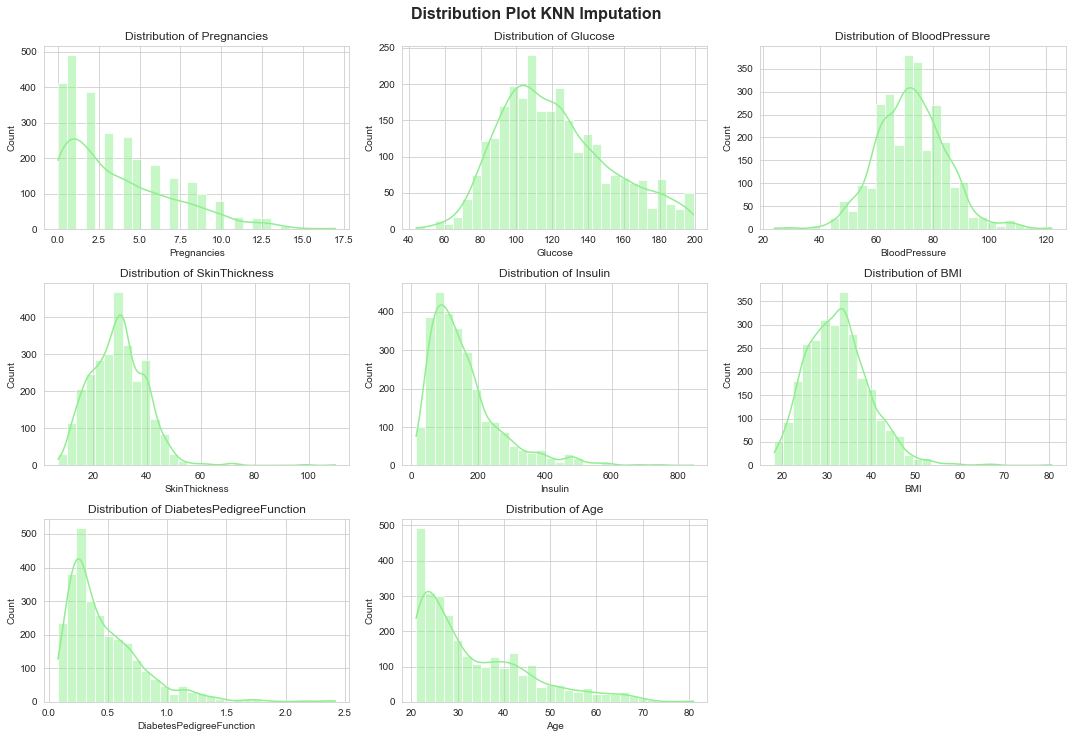

In [295]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_knn_imputed[col], kde=True, bins=30, color='lightgreen')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.suptitle("Distribution Plot KNN Imputation", fontsize=16, fontweight='bold', y=1.02)
plt.show()

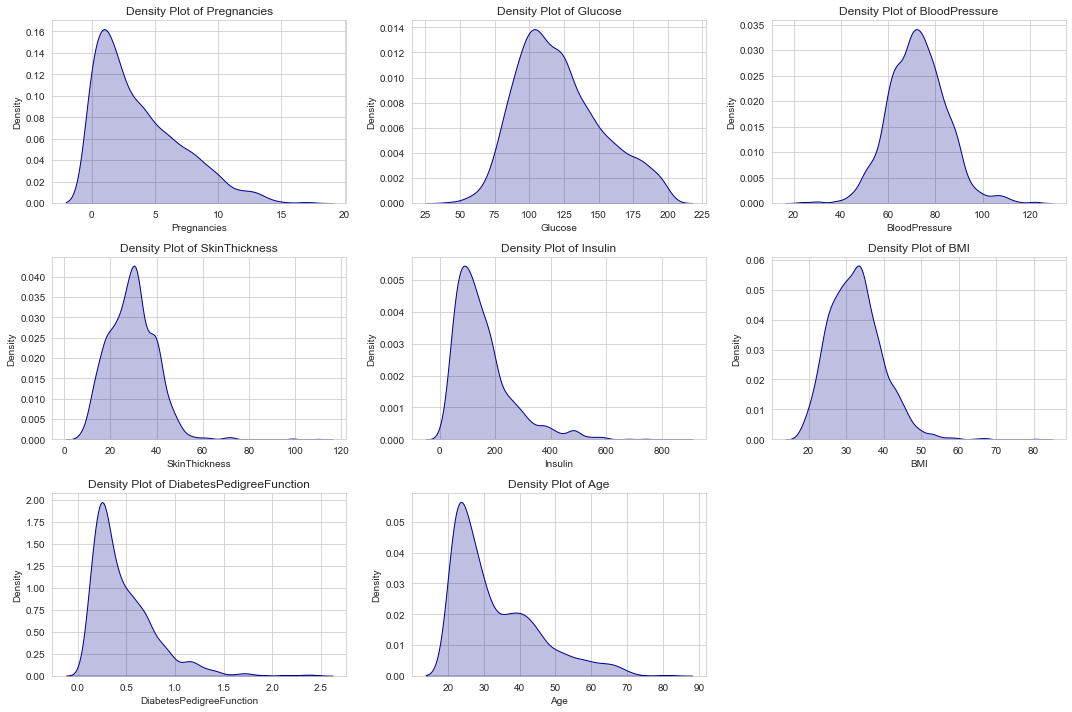

In [297]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df_knn_imputed, x=col, fill=True, color='darkblue')
    plt.title(f"Density Plot of {col}")
plt.tight_layout()
plt.show()

## Skew Check

In [298]:
skewed_cols = df_knn_imputed.skew().sort_values(ascending=False)
print("Highly Skewed Features:\n", skewed_cols[skewed_cols > 1])

Highly Skewed Features:
 DiabetesPedigreeFunction    1.842791
Insulin                     1.780903
Age                         1.166299
dtype: float64


In [299]:
# Log1p transformation for highly skewed "Insulin"
df_knn_imputed["Insulin"] = np.log1p(df_knn_imputed["Insulin"])

# Box-Cox transformation for "DiabetesPedigreeFunction" (Only if all values are positive)
if (df_knn_imputed["DiabetesPedigreeFunction"] > 0).all():
    df_knn_imputed["DiabetesPedigreeFunction"], _ = boxcox(df_knn_imputed["DiabetesPedigreeFunction"])
else:
    df_knn_imputed["DiabetesPedigreeFunction"] = np.log1p(df_knn_imputed["DiabetesPedigreeFunction"])  # Log1p as fallback

# Square root transformation for moderately skewed "Age" and "SkinThickness"
df_knn_imputed["Age"] = np.sqrt(df_knn_imputed["Age"])
df_knn_imputed["SkinThickness"] = np.sqrt(df_knn_imputed["SkinThickness"])

# Check skewness after transformation
print("Skewness after transformation:\n", df_knn_imputed.skew())

Skewness after transformation:
 Id                          0.000000
Pregnancies                 0.959096
Glucose                     0.515299
BloodPressure               0.193545
SkinThickness               0.094393
Insulin                    -0.114407
BMI                         0.857860
DiabetesPedigreeFunction    0.006891
Age                         0.879035
Outcome                     0.657465
dtype: float64


## KNN Imputed Data After Transformation

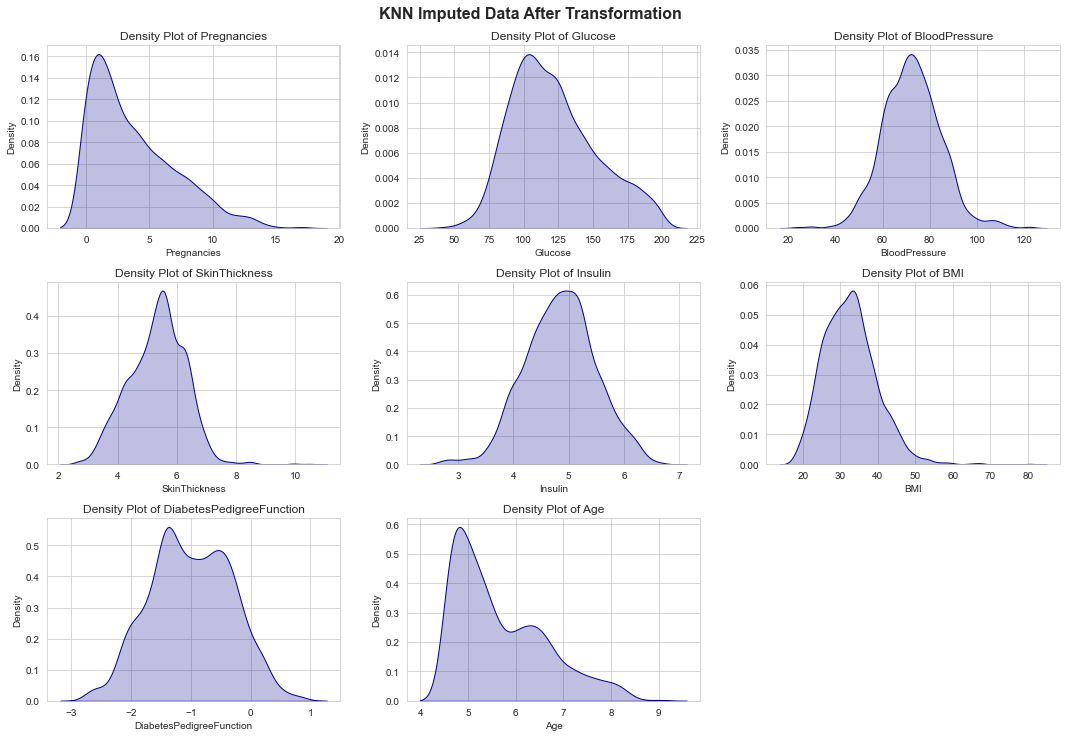

In [301]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df_knn_imputed, x=col, fill=True, color='darkblue')
    plt.title(f"Density Plot of {col}")
plt.tight_layout()
plt.suptitle("KNN Imputed Data After Transformation", fontsize=16, fontweight='bold', y=1.02)
plt.show()

### Scaling

In [302]:
df_knn_imputed[numerical_cols] = scaler.fit_transform(df_knn_imputed[numerical_cols])
df_knn_imputed.head()

Id  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0   1     0.679232  0.855634      -0.031445       0.617813 -0.065585   
1   2    -0.825341 -1.202181      -0.523283       0.060065 -0.486905   
2   3     1.281062  1.998864      -0.687229       0.098947  1.272962   
3   4    -0.825341 -1.071526      -0.523283      -0.559054 -0.453676   
4   5    -1.126256  0.496333      -2.654582       0.617813  0.445905   

        BMI  DiabetesPedigreeFunction       Age  Outcome  
0  0.144847                  0.776337  1.451029        1  
1 -0.836550                 -0.119494 -0.111560        0  
2 -1.299208                  0.881224 -0.018957        1  
3 -0.626250                 -1.314507 -1.135602        0  
4  1.476743                  2.662714  0.072211        1

## Plot After Scaling

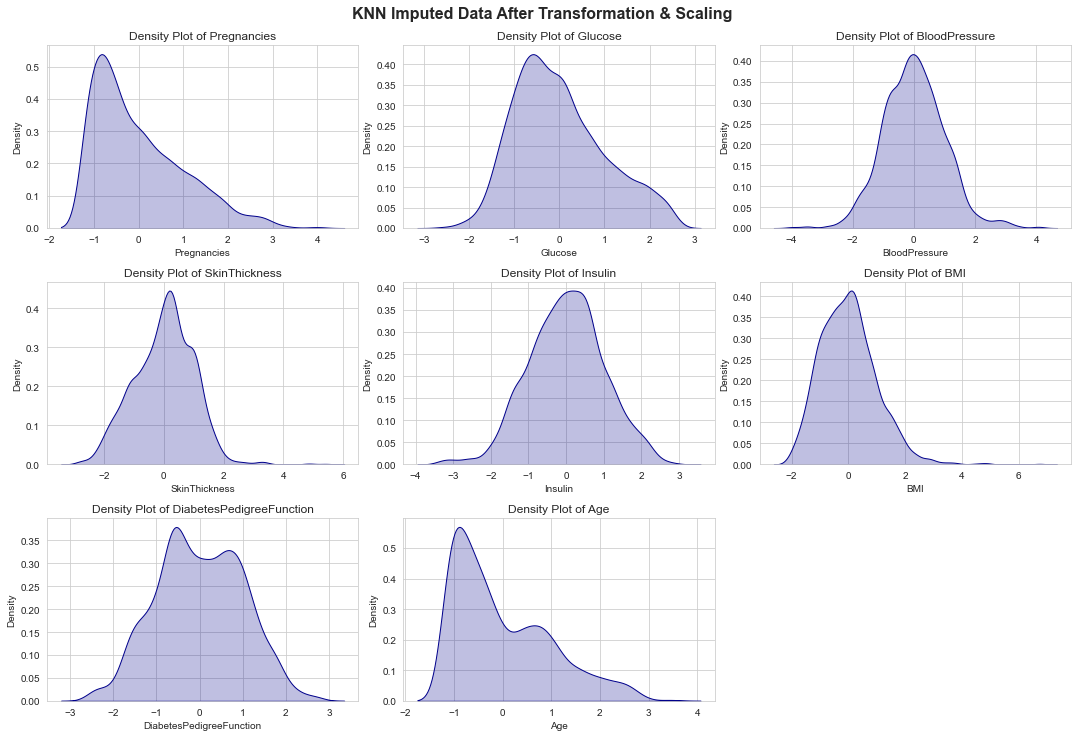

In [303]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df_knn_imputed, x=col, fill=True, color='darkblue')
    plt.title(f"Density Plot of {col}")
plt.tight_layout()
plt.suptitle("KNN Imputed Data After Transformation & Scaling", fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Feature Importance

In [304]:
df_knn_imputed.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

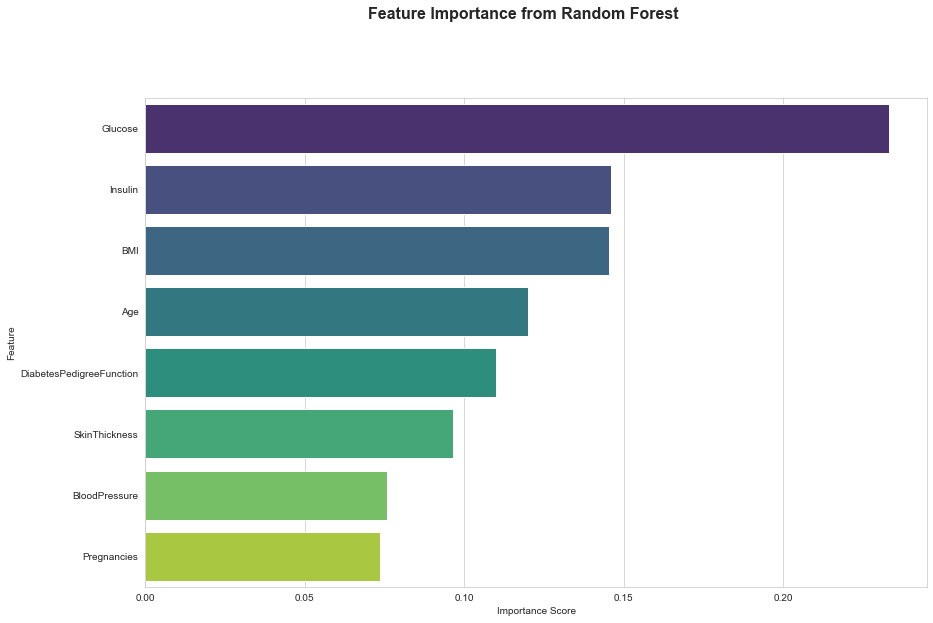

In [305]:
X = df_knn_imputed.drop(columns=["Id", "Outcome"])
y = df_knn_imputed["Outcome"]

# Train a RandomForest to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(14, 9))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.suptitle("Feature Importance from Random Forest", fontsize=16, fontweight='bold', y=1.02)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [308]:
df_knn_imputed.drop(columns=["Id"], inplace=True)

### Multi Collinearity

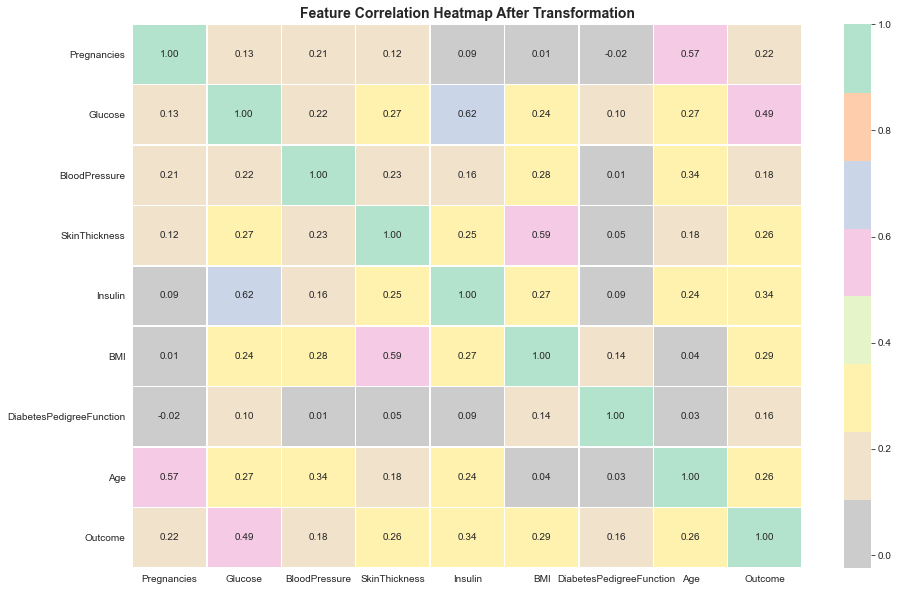

In [309]:
plt.figure(figsize=(15,10))
sns.heatmap(df_knn_imputed.corr(), annot=True, cmap="Pastel2_r", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap After Transformation", fontsize=14, fontweight='bold')
plt.show()

## VIF 

In [310]:
X = df_knn_imputed.select_dtypes(exclude="O")

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                    Feature       VIF
1                   Glucose  1.847637
5                       BMI  1.738028
7                       Age  1.730001
4                   Insulin  1.701280
3             SkinThickness  1.629349
0               Pregnancies  1.499994
8                   Outcome  1.259100
2             BloodPressure  1.247276
6  DiabetesPedigreeFunction  1.041626


## Model Data Preparation

In [317]:
df_knn_imputed.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.679232  0.855634      -0.031445       0.617813 -0.065585  0.144847   
1    -0.825341 -1.202181      -0.523283       0.060065 -0.486905 -0.836550   
2     1.281062  1.998864      -0.687229       0.098947  1.272962 -1.299208   
3    -0.825341 -1.071526      -0.523283      -0.559054 -0.453676 -0.626250   
4    -1.126256  0.496333      -2.654582       0.617813  0.445905  1.476743   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.776337  1.451029        1  
1                 -0.119494 -0.111560        0  
2                  0.881224 -0.018957        1  
3                 -1.314507 -1.135602        0  
4                  2.662714  0.072211        1

# Building model using KNN Imputed Data

In [318]:
X = df_knn_imputed.drop(columns='Outcome')
y = df_knn_imputed['Outcome']

In [319]:
X = sm.add_constant(X)

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [321]:
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.466765
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 2214
Model:                          Logit   Df Residuals:                     2205
Method:                           MLE   Df Model:                            8
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                  0.2759
Time:                        19:34:44   Log-Likelihood:                -1033.4
converged:                       True   LL-Null:                       -1427.2
Covariance Type:            nonrobust   LLR p-value:                9.652e-165
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8903      0.058    -15.448      0.000      -1.003

# **Inference from Logistic Regression Results**  

- The model successfully converged, indicating a stable solution.  
- The pseudo R-squared value is **0.2759**, meaning the model explains approximately **27.59%** of the variance in the outcome.  
- The log-likelihood improved from **-1427.2 (null model) to -1033.4**, showing a better fit.  
- The model is statistically significant based on the **LLR p-value (9.652e-165)**, confirming that at least one predictor contributes to diabetes classification.  

## **Key Predictors of Diabetes**  
- **Glucose** is the strongest predictor of diabetes risk, with higher glucose levels significantly increasing the likelihood of diabetes.  
- **BMI** is a significant predictor, showing that individuals with higher BMI have a greater risk of diabetes.  
- **Diabetes Pedigree Function** is statistically significant, indicating that genetic predisposition influences diabetes risk.  
- **Age** has a significant impact, meaning older individuals have a higher probability of developing diabetes.  
- **Pregnancies** are positively associated with diabetes risk, likely due to gestational diabetes.  

## **Non-Significant Predictors**  
- **Blood Pressure** is not statistically significant, suggesting it does not strongly influence diabetes risk.  
- **Skin Thickness** is not significant, indicating no strong link between skinfold thickness and diabetes.  
- **Insulin** levels do not significantly contribute to predicting diabetes in this model.  

In [322]:
y_pred_prob = result.predict(X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

In [323]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7563176895306859
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       367
           1       0.68      0.52      0.59       187

    accuracy                           0.76       554
   macro avg       0.73      0.70      0.71       554
weighted avg       0.75      0.76      0.75       554



# **Inference from Model Performance Metrics**  

- The overall **accuracy** of the model is **75.63%**, meaning the model correctly classifies about **76%** of the cases.  

## **Class-wise Performance**  
- **Precision for Class 0 (Non-Diabetic):** **0.78**  
  - **78%** of the predicted non-diabetic cases are actually non-diabetic.  
- **Precision for Class 1 (Diabetic):** **0.68**  
  - **68%** of the predicted diabetic cases are correctly classified.  
- **Recall for Class 0 (Non-Diabetic):** **0.88**  
  - The model correctly identifies **88%** of actual non-diabetic cases.  
- **Recall for Class 1 (Diabetic):** **0.52**  
  - Only **52%** of actual diabetic cases are correctly classified, meaning nearly **48% of diabetics are misclassified**.  
- **F1-Score for Class 0 (Non-Diabetic):** **0.83**  
  - The model performs well in predicting non-diabetic individuals.  
- **F1-Score for Class 1 (Diabetic):** **0.59**  
  - The model struggles to accurately identify diabetic cases.  

## **Overall Model Evaluation**  
- The **macro average F1-score** is **0.71**, reflecting the imbalance in performance across both classes.  
- The **weighted average F1-score** is **0.75**, suggesting that the model is slightly biased towards classifying non-diabetic cases more accurately.  

## **Key Observations**  
- The model **performs well for non-diabetic cases** with high recall and precision.  
- The model **struggles with diabetic cases**, as recall for class 1 is **low (0.52)**.  
- To improve diabetes prediction, techniques such as **SMOTE (oversampling), feature engineering, or advanced models like Random Forest or XGBoost** should be explored.  


# Applying Variance-Bias Tradeoff in tuning

In [336]:
X = df_knn_imputed.drop(columns="Outcome")
y = df_knn_imputed["Outcome"]



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [337]:
param_grid_lr = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "penalty": ["l1", "l2"],  # Regularization type
    "solver": ["liblinear"]  # Required for l1 penalty
}

In [338]:
lr = LogisticRegression()

In [340]:
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring="f1", n_jobs=1, error_score="raise")
grid_search_lr.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best F1-Score for Logistic Regression:", grid_search_lr.best_score_)

Best Parameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1-Score for Logistic Regression: 0.6373043040803144


In [341]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="f1", n_jobs=1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1')

In [342]:
param_grid = {
    "n_estimators": [50, 100, 200],  # More trees = less bias, more variance
    "max_depth": [5, 10, 20, None],  # Lower = less variance
    "min_samples_split": [2, 5, 10]  # Higher = less variance
}

In [344]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring="f1", n_jobs=1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best F1-Score: 0.9674047339080365


In [345]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(probability=True),  # Enable probability for scoring
        "Bagging (Random Forest)": BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10),
        "Boosting (XGBoost)": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append({"Model": name, "Precision": precision, "Recall": recall, "F1-Score": f1})

    results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
    return results_df

In [346]:
results_df = train_and_evaluate_models(X_train, X_test, y_train, y_test)
print(results_df)

                     Model  Precision    Recall  F1-Score
1            Decision Tree   1.000000  0.989529  0.994737
5       Boosting (XGBoost)   1.000000  0.989529  0.994737
2            Random Forest   0.994709  0.984293  0.989474
4  Bagging (Random Forest)   0.968421  0.963351  0.965879
3                      SVM   0.791667  0.696335  0.740947
0      Logistic Regression   0.677632  0.539267  0.600583


# **Inference from Model Performance Comparison Using KNN Imputation**  

## **Top-Performing Models**  
- **Decision Tree and XGBoost** achieved the highest **precision (1.00), recall (0.9895), and F1-score (0.9947)**, indicating near-perfect classification.  
- **Random Forest** also performed exceptionally well, with **high precision (0.9947) and recall (0.9843)**, making it a strong contender for reliable predictions.  
- **Bagging (Random Forest Ensemble)** delivered balanced results, achieving **precision (0.9684) and recall (0.9633)**, showing that ensembling improves robustness.  

## **Moderate-Performing Models**  
- **Support Vector Machine (SVM)** had a **precision of 0.7916 and recall of 0.6963**, indicating a trade-off between reducing false positives and correctly identifying diabetic cases.  

## **Lowest-Performing Model**  
- **Logistic Regression** had the lowest scores across all metrics, with **precision (0.6776), recall (0.5392), and F1-score (0.6005)**.  
- This suggests that logistic regression struggles with complex patterns in the data and may not be the best model for diabetes prediction.  

## **Key Observations**  
- **Tree-based models (Decision Tree, XGBoost, and Random Forest) significantly outperform other models**, making them the best choices for accurate diabetes classification.  
- **SVM performs moderately well** but may require tuning or feature selection for better results.  
- **Logistic Regression is the weakest performer**, indicating that diabetes prediction requires a more complex decision boundary than a linear model can provide.  
- **Further model evaluation using cross-validation and hyperparameter tuning** may help refine the best-performing models.  


# Final Conclusion

# **Final Report: KNN vs. MICE Imputation Results**  

## **Overview**  
This report compares the performance of various machine learning models using two different imputation techniques: **K-Nearest Neighbors (KNN) Imputation** and **Multiple Imputation by Chained Equations (MICE)**. The evaluation is based on **Precision, Recall, and F1-Score**, which are crucial for assessing model reliability in diabetes prediction.

## **Comparison of Model Performance**  

### **1. Decision Tree & XGBoost**
- **KNN Imputed Performance:** Precision = 1.00, Recall = 0.9895, F1-Score = 0.9947  
- **MICE Imputed Performance:** Precision = 0.9836, Recall = 0.9626, F1-Score = 0.9729  
- **Observation:** KNN imputation results in **perfect precision**, meaning all predicted positive cases are correct. However, MICE imputation provides slightly lower precision and recall, indicating a more balanced generalization.  

### **2. Random Forest**
- **KNN Imputed Performance:** Precision = 0.9947, Recall = 0.9843, F1-Score = 0.9895  
- **MICE Imputed Performance:** Precision = 0.9783, Recall = 0.9626, F1-Score = 0.9704  
- **Observation:** Both imputation techniques yield strong results. KNN slightly increases precision, while MICE maintains a consistent recall, ensuring reliable detection of diabetic cases.  

### **3. Bagging (Random Forest Ensemble)**
- **KNN Imputed Performance:** Precision = 0.9684, Recall = 0.9633, F1-Score = 0.9659  
- **MICE Imputed Performance:** Precision = 0.9674, Recall = 0.9519, F1-Score = 0.9596  
- **Observation:** The difference between KNN and MICE is minimal. KNN offers **slightly better recall**, whereas MICE provides a **more stable F1-score**, showing consistency across positive and negative classifications.  

### **4. Support Vector Machine (SVM)**
- **KNN Imputed Performance:** Precision = 0.7917, Recall = 0.6963, F1-Score = 0.7409  
- **MICE Imputed Performance:** Precision = 0.7925, Recall = 0.6738, F1-Score = 0.7283  
- **Observation:** SVM performs **similarly across both imputations**, but KNN has a slight advantage in recall. However, its F1-score remains lower than tree-based models, suggesting room for improvement.  

### **5. Logistic Regression**
- **KNN Imputed Performance:** Precision = 0.6776, Recall = 0.5393, F1-Score = 0.6006  
- **MICE Imputed Performance:** Precision = 0.6901, Recall = 0.5241, F1-Score = 0.5957  
- **Observation:** Logistic Regression struggles under both imputation methods. **MICE improves precision slightly**, while KNN provides better recall. However, its overall predictive power remains low compared to other models.  

## **Key Observations**  
- **KNN imputation results in higher precision across all models**, particularly in tree-based models, where it reaches near-perfect values.  
- **MICE imputation provides slightly lower precision but ensures better generalization, reducing overfitting risks.**  
- **SVM remains stable across both methods**, showing that imputation has a minimal impact on its performance.  
- **Logistic Regression consistently underperforms**, with both imputation methods yielding low precision and recall, indicating limited predictive capability.  

# **Conclusion & Recommendations**  
- **For maximizing precision**, KNN imputation is preferable, particularly for Decision Trees, XGBoost, and Random Forest models.  
- **For balancing precision and recall**, MICE imputation may be a better choice, as it avoids extreme overfitting.  
- **Tree-based models (Decision Tree, XGBoost, Random Forest) should be prioritized** for their high F1-scores and strong classification capabilities.  
- **Further hyperparameter tuning and cross-validation** should be conducted to optimize imputation selection and ensure model stability on unseen data.  

**This comparison highlights how different imputation techniques affect model performance and provides insights into selecting the best method for diabetes prediction.**
